In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score,classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data_tnap = pd.read_csv('CROP_TNAP.csv')
data_tnap

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production
0,Andhra Pradesh,ANANTAPUR,2004,Kharif,Arhar/Tur,21400,23.78000,3.120000,1012.000000,84.000000,sandy,1.600,2.000,0.0,2600
1,Andhra Pradesh,ANANTAPUR,2004,Kharif,Bajra,1400,23.78000,3.120000,1012.000000,84.000000,loamy,1.775,0.000,0.0,500
2,Andhra Pradesh,ANANTAPUR,2004,Kharif,Castor seed,1000,23.78000,3.120000,1012.000000,84.000000,silt,2.484,2.484,0.0,100
3,Andhra Pradesh,ANANTAPUR,2004,Kharif,Dry chillies,3700,23.78000,3.120000,1012.000000,84.000000,peaty,843.640,0.000,0.0,7100
4,Andhra Pradesh,ANANTAPUR,2004,Kharif,Groundnut,650800,23.78000,3.120000,1012.000000,84.000000,silt,6.390,16.330,0.0,228400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23169,Tamil Nadu,VIRUDHUNAGAR,2020,Whole Year,Small millets,1187,20.48349,1.971802,1013.011877,64.876363,sandy,2.921,2.921,0.0,676
23170,Tamil Nadu,VIRUDHUNAGAR,2020,Whole Year,Sugarcane,2917,20.48349,1.971802,1013.011877,64.876363,peaty,0.000,0.000,0.0,296017
23171,Tamil Nadu,VIRUDHUNAGAR,2020,Whole Year,Sweet potato,4,20.48349,1.971802,1013.011877,64.876363,sandy,928.372,0.000,0.0,84
23172,Tamil Nadu,VIRUDHUNAGAR,2020,Whole Year,Tapioca,4,20.48349,1.971802,1013.011877,64.876363,sandy,6.930,17.710,0.0,120


In [3]:
data_tnap.shape

(23174, 15)

In [4]:
data_tnap.dtypes

state_names        object
district_names     object
crop_year           int64
season_names       object
crop_names         object
area                int64
temperature       float64
wind_speed        float64
precipitation     float64
humidity          float64
soil_type          object
N                 float64
P                 float64
K                 float64
production         object
dtype: object

In [5]:
print(data_tnap.isnull().sum())

state_names       0
district_names    0
crop_year         0
season_names      0
crop_names        0
area              0
temperature       0
wind_speed        0
precipitation     0
humidity          0
soil_type         0
N                 0
P                 0
K                 0
production        0
dtype: int64


In [6]:
data_tnap.describe()

,crop_year,area,temperature,wind_speed,precipitation,humidity,N,P,K
count,23174.000000,23174.000000,23174.000000,23174.000000,23174.000000,23174.000000,23174.000000,23174.000000,23174.000000
mean,2012.392595,9814.642746,21.345367,2.064657,1012.643512,69.528078,63.434635,13.194760,6.213494
std,4.947383,34482.349285,1.639046,0.418467,0.713183,9.068249,206.536129,23.806892,14.153013
min,2004.000000,1.000000,20.483490,1.410000,1011.000000,64.876363,0.000000,0.000000,0.000000
25%,2009.000000,85.250000,20.483490,1.971802,1013.011877,64.876363,0.615000,0.000000,0.000000
50%,2012.000000,825.500000,20.483490,1.971802,1013.011877,64.876363,4.068000,3.760000,0.000000
75%,2017.000000,5103.000000,20.483490,1.971802,1013.011877,64.876363,10.580000,15.870000,1.501000
max,2021.000000,877029.000000,25.940000,3.490000,1013.011877,95.000000,928.372000,111.200000,55.600000


In [7]:
data_tnap.describe(include='object')

,state_names,district_names,season_names,crop_names,soil_type,production
count,23174,23174,23174,23174,23174,23174
unique,2,44,3,99,7,10407
top,Tamil Nadu,KURNOOL,Whole Year,Groundnut,silt,0
freq,13547,828,9997,1011,3396,981


In [8]:
data_tnap['temperature'] = data_tnap['temperature'].round(2)
data_tnap['humidity'] = data_tnap['humidity'].round(2)
data_tnap['precipitation'] = data_tnap['precipitation'].round(2)
data_tnap['wind_speed'] = data_tnap['wind_speed'].round(2)
data_tnap

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production
0,Andhra Pradesh,ANANTAPUR,2004,Kharif,Arhar/Tur,21400,23.78,3.12,1012.00,84.00,sandy,1.600,2.000,0.0,2600
1,Andhra Pradesh,ANANTAPUR,2004,Kharif,Bajra,1400,23.78,3.12,1012.00,84.00,loamy,1.775,0.000,0.0,500
2,Andhra Pradesh,ANANTAPUR,2004,Kharif,Castor seed,1000,23.78,3.12,1012.00,84.00,silt,2.484,2.484,0.0,100
3,Andhra Pradesh,ANANTAPUR,2004,Kharif,Dry chillies,3700,23.78,3.12,1012.00,84.00,peaty,843.640,0.000,0.0,7100
4,Andhra Pradesh,ANANTAPUR,2004,Kharif,Groundnut,650800,23.78,3.12,1012.00,84.00,silt,6.390,16.330,0.0,228400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23169,Tamil Nadu,VIRUDHUNAGAR,2020,Whole Year,Small millets,1187,20.48,1.97,1013.01,64.88,sandy,2.921,2.921,0.0,676
23170,Tamil Nadu,VIRUDHUNAGAR,2020,Whole Year,Sugarcane,2917,20.48,1.97,1013.01,64.88,peaty,0.000,0.000,0.0,296017
23171,Tamil Nadu,VIRUDHUNAGAR,2020,Whole Year,Sweet potato,4,20.48,1.97,1013.01,64.88,sandy,928.372,0.000,0.0,84
23172,Tamil Nadu,VIRUDHUNAGAR,2020,Whole Year,Tapioca,4,20.48,1.97,1013.01,64.88,sandy,6.930,17.710,0.0,120


In [9]:
#handling the non numeric values
data_tnap['production'] = pd.to_numeric(data_tnap['production'], errors='coerce')
data_tnap

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production
0,Andhra Pradesh,ANANTAPUR,2004,Kharif,Arhar/Tur,21400,23.78,3.12,1012.00,84.00,sandy,1.600,2.000,0.0,2600.0
1,Andhra Pradesh,ANANTAPUR,2004,Kharif,Bajra,1400,23.78,3.12,1012.00,84.00,loamy,1.775,0.000,0.0,500.0
2,Andhra Pradesh,ANANTAPUR,2004,Kharif,Castor seed,1000,23.78,3.12,1012.00,84.00,silt,2.484,2.484,0.0,100.0
3,Andhra Pradesh,ANANTAPUR,2004,Kharif,Dry chillies,3700,23.78,3.12,1012.00,84.00,peaty,843.640,0.000,0.0,7100.0
4,Andhra Pradesh,ANANTAPUR,2004,Kharif,Groundnut,650800,23.78,3.12,1012.00,84.00,silt,6.390,16.330,0.0,228400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23169,Tamil Nadu,VIRUDHUNAGAR,2020,Whole Year,Small millets,1187,20.48,1.97,1013.01,64.88,sandy,2.921,2.921,0.0,676.0
23170,Tamil Nadu,VIRUDHUNAGAR,2020,Whole Year,Sugarcane,2917,20.48,1.97,1013.01,64.88,peaty,0.000,0.000,0.0,296017.0
23171,Tamil Nadu,VIRUDHUNAGAR,2020,Whole Year,Sweet potato,4,20.48,1.97,1013.01,64.88,sandy,928.372,0.000,0.0,84.0
23172,Tamil Nadu,VIRUDHUNAGAR,2020,Whole Year,Tapioca,4,20.48,1.97,1013.01,64.88,sandy,6.930,17.710,0.0,120.0


In [10]:
print(data_tnap.isnull().sum())

state_names         0
district_names      0
crop_year           0
season_names        0
crop_names          0
area                0
temperature         0
wind_speed          0
precipitation       0
humidity            0
soil_type           0
N                   0
P                   0
K                   0
production        348
dtype: int64


In [11]:
production_median = data_tnap['production'].median()
data_tnap['production'].fillna(production_median,inplace=True)
data_tnap[data_tnap['production'].isnull()].head()

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production


In [12]:
print(data_tnap.isnull().sum())

state_names       0
district_names    0
crop_year         0
season_names      0
crop_names        0
area              0
temperature       0
wind_speed        0
precipitation     0
humidity          0
soil_type         0
N                 0
P                 0
K                 0
production        0
dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['crop_names', 'season_names', 'soil_type']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data_tnap[col + '_encoded'] = le.fit_transform(data_tnap[col].astype(str))  # Encode the column
    label_encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Store mapping
for col in categorical_features:
    print(f"Mapping for {col}:")
    for original_value, encoded_value in label_encoders[col].items():
        print(f"{original_value}:{encoded_value}")
    print()

Mapping for crop_names:
Apple:0
Arecanut:1
Arhar/Tur:2
Ash Gourd:3
Bajra:4
Banana:5
Beans & Mutter(Vegetable):6
Beet Root:7
Ber:8
Bhindi:9
Bitter Gourd:10
Black pepper:11
Bottle Gourd:12
Brinjal:13
Cabbage:14
Cardamom:15
Carrot:16
Cashewnut:17
Castor seed:18
Cauliflower:19
Citrus Fruit:20
Coconut :21
Coriander:22
Cotton(lint):23
Cowpea(Lobia):24
Cucumber:25
Drum Stick:26
Dry chillies:27
Dry ginger:28
Garlic:29
Ginger:30
Gram:31
Grapes:32
Groundnut:33
Guar seed:34
Horse-gram:35
Jack Fruit:36
Jowar:37
Jute:38
Korra:39
Lab-Lab:40
Lemon:41
Linseed:42
Litchi:43
Maize:44
Mango:45
Masoor:46
Mesta:47
Moong(Green Gram):48
Niger seed:49
Onion:50
Orange:51
Other  Rabi pulses:52
Other Cereals & Millets:53
Other Citrus Fruit:54
Other Fresh Fruits:55
Other Kharif pulses:56
Other Vegetables:57
Papaya:58
Peach:59
Pear:60
Peas  (vegetable):61
Pineapple:62
Plums:63
Pome Fruit:64
Pome Granet:65
Potato:66
Pulses total:67
Pump Kin:68
Ragi:69
Rapeseed &Mustard:70
Redish:71
Ribed Guard:72
Rice:73
Safflower:7

In [14]:
categorical_features = ['crop_names','season_names', 'soil_type']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data_tnap[col] = le.fit_transform(data_tnap[col].astype(str))
    label_encoders[col] = le

In [15]:
data_tnap

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production,crop_names_encoded,season_names_encoded,soil_type_encoded
0,Andhra Pradesh,ANANTAPUR,2004,0,2,21400,23.78,3.12,1012.00,84.00,4,1.600,2.000,0.0,2600.0,2,0,4
1,Andhra Pradesh,ANANTAPUR,2004,0,4,1400,23.78,3.12,1012.00,84.00,2,1.775,0.000,0.0,500.0,4,0,2
2,Andhra Pradesh,ANANTAPUR,2004,0,18,1000,23.78,3.12,1012.00,84.00,5,2.484,2.484,0.0,100.0,18,0,5
3,Andhra Pradesh,ANANTAPUR,2004,0,27,3700,23.78,3.12,1012.00,84.00,3,843.640,0.000,0.0,7100.0,27,0,3
4,Andhra Pradesh,ANANTAPUR,2004,0,33,650800,23.78,3.12,1012.00,84.00,5,6.390,16.330,0.0,228400.0,33,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23169,Tamil Nadu,VIRUDHUNAGAR,2020,2,79,1187,20.48,1.97,1013.01,64.88,4,2.921,2.921,0.0,676.0,79,2,4
23170,Tamil Nadu,VIRUDHUNAGAR,2020,2,82,2917,20.48,1.97,1013.01,64.88,3,0.000,0.000,0.0,296017.0,82,2,3
23171,Tamil Nadu,VIRUDHUNAGAR,2020,2,84,4,20.48,1.97,1013.01,64.88,4,928.372,0.000,0.0,84.0,84,2,4
23172,Tamil Nadu,VIRUDHUNAGAR,2020,2,85,4,20.48,1.97,1013.01,64.88,4,6.930,17.710,0.0,120.0,85,2,4


In [16]:
#finding the o value in the column 
print(data_tnap['N'].value_counts())
print(data_tnap['P'].value_counts())
print(data_tnap['K'].value_counts())

0.000      5030
38.250     1324
2.775       266
2.100       265
2.800       265
           ... 
890.974     132
6.858       132
27.195      132
7.460       132
8.876       132
Name: N, Length: 126, dtype: int64
0.000     7946
38.250    1324
2.160      264
2.000      133
3.620      133
          ... 
6.055      132
2.860      132
1.771      132
17.526     132
8.876      132
Name: P, Length: 106, dtype: int64
0.000     16423
38.250     1324
55.600      133
5.824       133
52.960      133
27.300      133
3.255       133
7.504       133
55.328      133
0.465       133
2.100       133
26.624      133
14.664      133
26.234      133
1.950       133
0.152       133
51.856      133
0.615       132
1.288       132
5.700       132
17.368      132
10.208      132
5.408       132
11.778      132
52.272      132
0.825       132
1.501       132
13.780      132
49.120      132
2.160       132
0.045       132
2.422       132
50.272      132
9.386       132
0.975       132
1.596       132
51.584      1

In [17]:
# Replace `0` values in the N,P,K column with the median of non-zero values
potassium_non_zero_median = data_tnap.loc[data_tnap['K'] != 0, 'K'].median()
data_tnap['K'] = data_tnap['K'].replace(0, potassium_non_zero_median)
print("median value of k:",potassium_non_zero_median)
P_non_zero_median = data_tnap.loc[data_tnap['P'] != 0, 'P'].median()
data_tnap['P'] = data_tnap['P'].replace(0, P_non_zero_median)
print("median value of p:",P_non_zero_median)
N_non_zero_median = data_tnap.loc[data_tnap['N'] != 0, 'N'].median()
data_tnap['N'] = data_tnap['N'].replace(0, N_non_zero_median)
print("median value of nitrogen:",N_non_zero_median)
data_tnap

median value of k: 14.664
median value of p: 8.6
median value of nitrogen: 7.182


,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production,crop_names_encoded,season_names_encoded,soil_type_encoded
0,Andhra Pradesh,ANANTAPUR,2004,0,2,21400,23.78,3.12,1012.00,84.00,4,1.600,2.000,14.664,2600.0,2,0,4
1,Andhra Pradesh,ANANTAPUR,2004,0,4,1400,23.78,3.12,1012.00,84.00,2,1.775,8.600,14.664,500.0,4,0,2
2,Andhra Pradesh,ANANTAPUR,2004,0,18,1000,23.78,3.12,1012.00,84.00,5,2.484,2.484,14.664,100.0,18,0,5
3,Andhra Pradesh,ANANTAPUR,2004,0,27,3700,23.78,3.12,1012.00,84.00,3,843.640,8.600,14.664,7100.0,27,0,3
4,Andhra Pradesh,ANANTAPUR,2004,0,33,650800,23.78,3.12,1012.00,84.00,5,6.390,16.330,14.664,228400.0,33,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23169,Tamil Nadu,VIRUDHUNAGAR,2020,2,79,1187,20.48,1.97,1013.01,64.88,4,2.921,2.921,14.664,676.0,79,2,4
23170,Tamil Nadu,VIRUDHUNAGAR,2020,2,82,2917,20.48,1.97,1013.01,64.88,3,7.182,8.600,14.664,296017.0,82,2,3
23171,Tamil Nadu,VIRUDHUNAGAR,2020,2,84,4,20.48,1.97,1013.01,64.88,4,928.372,8.600,14.664,84.0,84,2,4
23172,Tamil Nadu,VIRUDHUNAGAR,2020,2,85,4,20.48,1.97,1013.01,64.88,4,6.930,17.710,14.664,120.0,85,2,4


In [18]:
# Verify that there are no more `0` values in the potassium column
print(data_tnap['N'].value_counts())
print(data_tnap['P'].value_counts())
print(data_tnap['K'].value_counts())

7.182      5162
38.250     1324
2.775       266
2.100       265
2.800       265
           ... 
890.974     132
6.858       132
27.195      132
7.460       132
8.876       132
Name: N, Length: 125, dtype: int64
8.600     8078
38.250    1324
2.160      264
2.000      133
3.620      133
          ... 
2.860      132
1.771      132
17.526     132
7.460      132
8.876      132
Name: P, Length: 105, dtype: int64
14.664    16556
38.250     1324
2.100       133
5.824       133
52.960      133
27.300      133
3.255       133
7.504       133
26.624      133
0.465       133
55.328      133
55.600      133
26.234      133
1.950       133
0.152       133
51.856      133
0.615       132
1.288       132
5.700       132
17.368      132
10.208      132
5.408       132
11.778      132
52.272      132
0.825       132
1.501       132
13.780      132
49.120      132
8.138       132
0.045       132
2.422       132
50.272      132
9.386       132
0.975       132
1.596       132
51.584      132
2.535       1

In [19]:
print(data_tnap.isnull().sum())

state_names             0
district_names          0
crop_year               0
season_names            0
crop_names              0
area                    0
temperature             0
wind_speed              0
precipitation           0
humidity                0
soil_type               0
N                       0
P                       0
K                       0
production              0
crop_names_encoded      0
season_names_encoded    0
soil_type_encoded       0
dtype: int64


In [20]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = ['temperature', 'precipitation', 'humidity', 'N', 'P', 'K', 'production']
scaler = StandardScaler()
data_tnap_scaled = pd.DataFrame(scaler.fit_transform(data_tnap[numeric_cols]), columns=numeric_cols)
data_tnap_scaled.head()

,temperature,precipitation,humidity,N,P,K,production
0,1.485787,-0.901247,1.595868,-0.307626,-0.629013,-0.180624,-0.052716
1,1.485787,-0.901247,1.595868,-0.306776,-0.335488,-0.180624,-0.052803
2,1.485787,-0.901247,1.595868,-0.303336,-0.607488,-0.180624,-0.052820
3,1.485787,-0.901247,1.595868,3.778488,-0.335488,-0.180624,-0.052528
4,1.485787,-0.901247,1.595868,-0.284381,0.008291,-0.180624,-0.043314


# Feature Engineering 

In [21]:
data_tnap['yield_kg_per_ha'] = data_tnap['production'] / data_tnap['area']
processed_data = pd.concat([data_tnap_scaled, data_tnap[col], data_tnap[['yield_kg_per_ha']].reset_index(drop=True)], axis=1)
#OUTLIER
q_low = processed_data['yield_kg_per_ha'].quantile(0.01)
q_high = processed_data['yield_kg_per_ha'].quantile(0.99)
processed_data = processed_data[(processed_data['yield_kg_per_ha'] > q_low) & (processed_data['yield_kg_per_ha'] < q_high)]
data_tnap['yield_kg_per_ha'] = data_tnap['yield_kg_per_ha'].round(2)
data_tnap

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production,crop_names_encoded,season_names_encoded,soil_type_encoded,yield_kg_per_ha
0,Andhra Pradesh,ANANTAPUR,2004,0,2,21400,23.78,3.12,1012.00,84.00,4,1.600,2.000,14.664,2600.0,2,0,4,0.12
1,Andhra Pradesh,ANANTAPUR,2004,0,4,1400,23.78,3.12,1012.00,84.00,2,1.775,8.600,14.664,500.0,4,0,2,0.36
2,Andhra Pradesh,ANANTAPUR,2004,0,18,1000,23.78,3.12,1012.00,84.00,5,2.484,2.484,14.664,100.0,18,0,5,0.10
3,Andhra Pradesh,ANANTAPUR,2004,0,27,3700,23.78,3.12,1012.00,84.00,3,843.640,8.600,14.664,7100.0,27,0,3,1.92
4,Andhra Pradesh,ANANTAPUR,2004,0,33,650800,23.78,3.12,1012.00,84.00,5,6.390,16.330,14.664,228400.0,33,0,5,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23169,Tamil Nadu,VIRUDHUNAGAR,2020,2,79,1187,20.48,1.97,1013.01,64.88,4,2.921,2.921,14.664,676.0,79,2,4,0.57
23170,Tamil Nadu,VIRUDHUNAGAR,2020,2,82,2917,20.48,1.97,1013.01,64.88,3,7.182,8.600,14.664,296017.0,82,2,3,101.48
23171,Tamil Nadu,VIRUDHUNAGAR,2020,2,84,4,20.48,1.97,1013.01,64.88,4,928.372,8.600,14.664,84.0,84,2,4,21.00
23172,Tamil Nadu,VIRUDHUNAGAR,2020,2,85,4,20.48,1.97,1013.01,64.88,4,6.930,17.710,14.664,120.0,85,2,4,30.00


# Exploratory Data Analysis

C:\Users\GOWRAV B\AppData\Local\Temp\ipykernel_9012\974956790.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_tnap.corr(), annot=True, cmap='coolwarm')


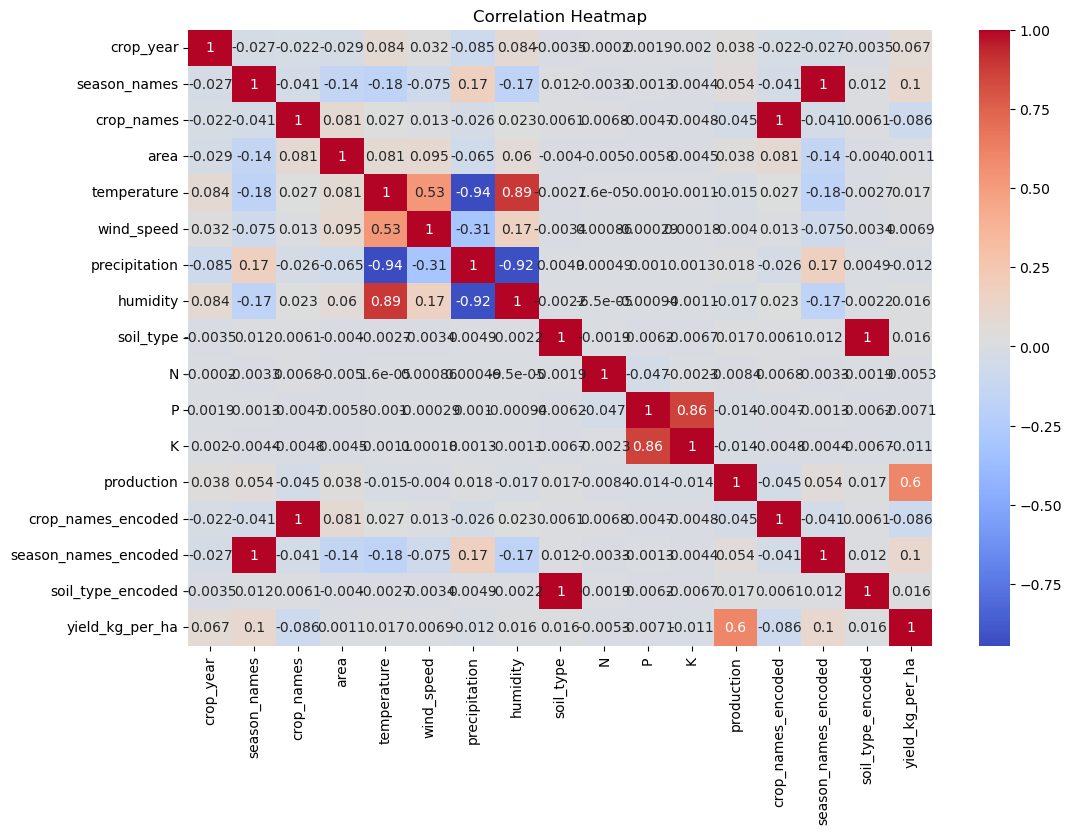

In [22]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_tnap.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

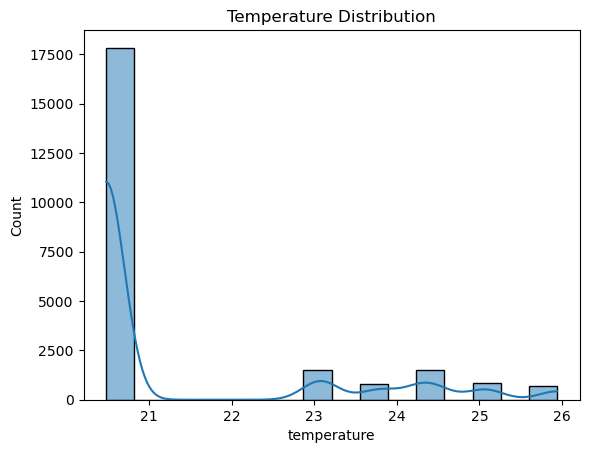

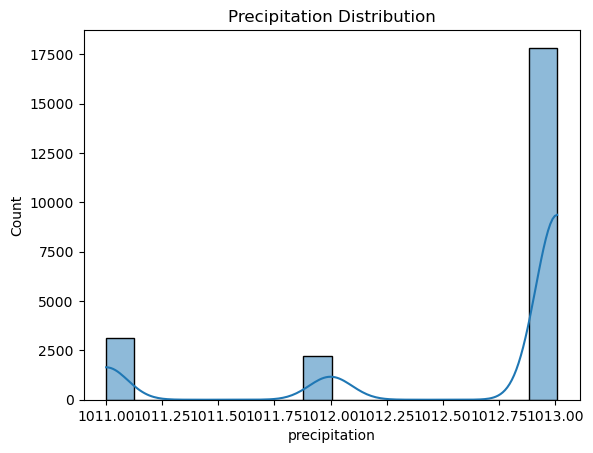

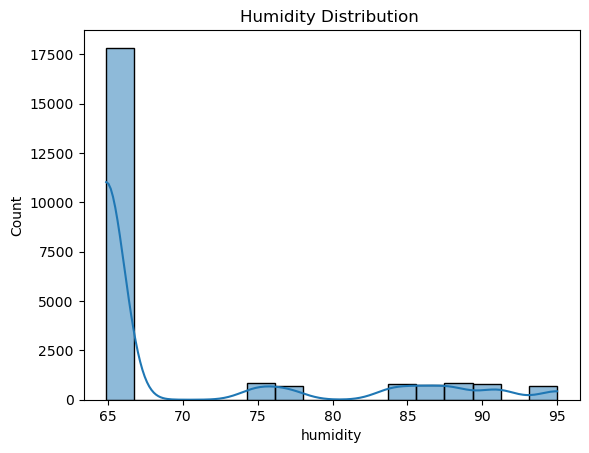

In [23]:
sns.histplot(data_tnap['temperature'], kde=True)
plt.title('Temperature Distribution')
plt.show()
sns.histplot(data_tnap['precipitation'], kde=True)
plt.title('Precipitation Distribution')
plt.show()
sns.histplot(data_tnap['humidity'], kde=True)
plt.title('Humidity Distribution ')
plt.show()

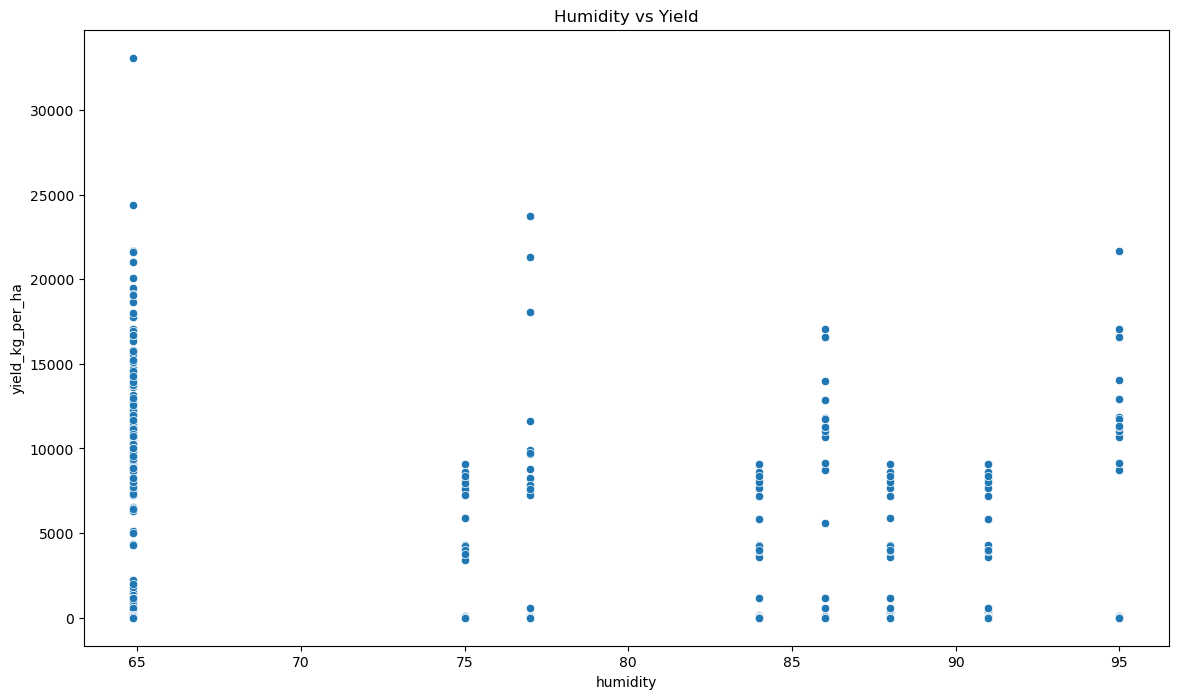

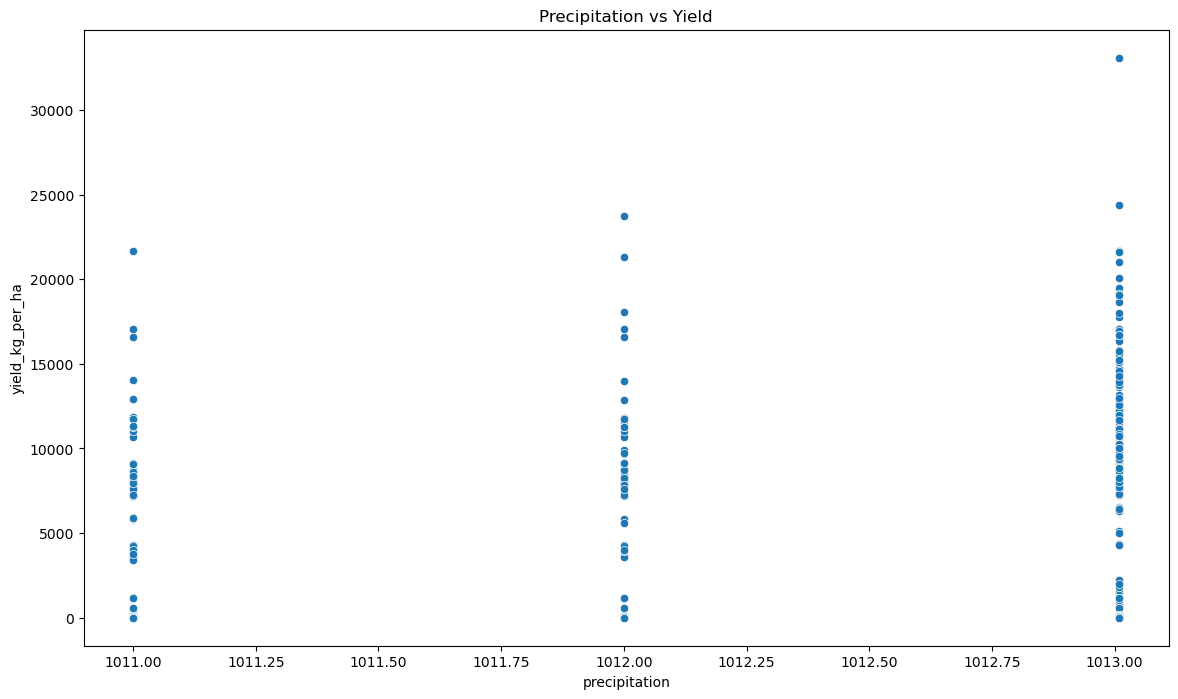

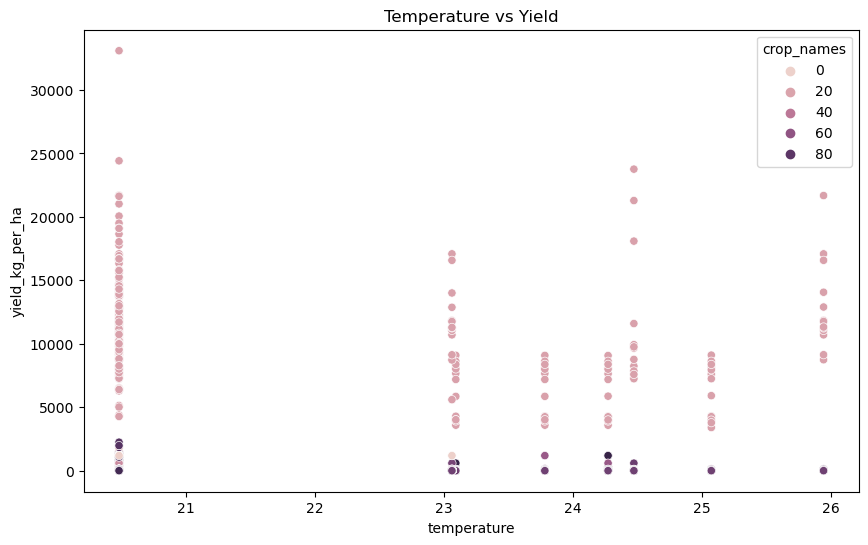

In [24]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='humidity', y='yield_kg_per_ha', data=data_tnap)
plt.title("Humidity vs Yield")
plt.show()
plt.figure(figsize=(14, 8))
sns.scatterplot(x='precipitation', y='yield_kg_per_ha', data=data_tnap)
plt.title("Precipitation vs Yield")
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='yield_kg_per_ha', hue='crop_names', data=data_tnap)
plt.title('Temperature vs Yield')
plt.show()

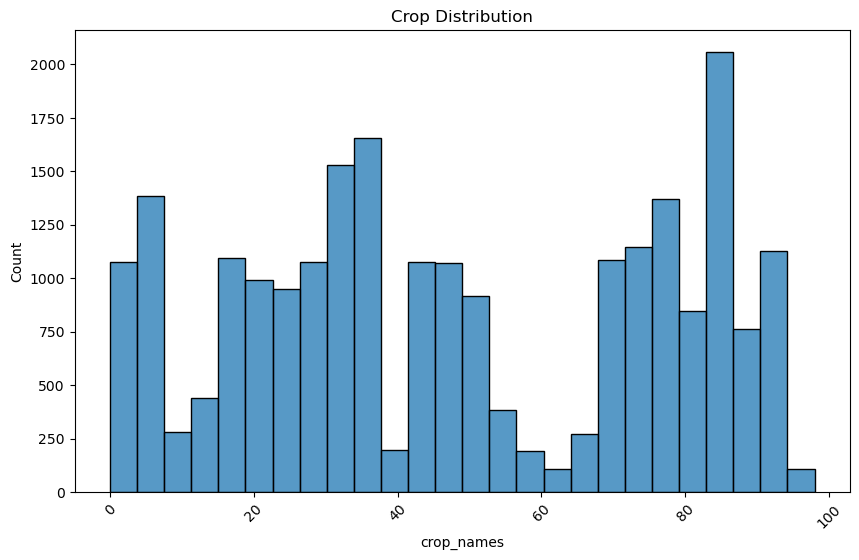

In [25]:
# Plot the distribution of crops and soil types
plt.figure(figsize=(10, 6))
#sns.countplot(x='crop_names', data=data_tnap)
sns.histplot(x='crop_names', data=data_tnap)
plt.title('Crop Distribution')
plt.xticks(rotation=45)
plt.show()

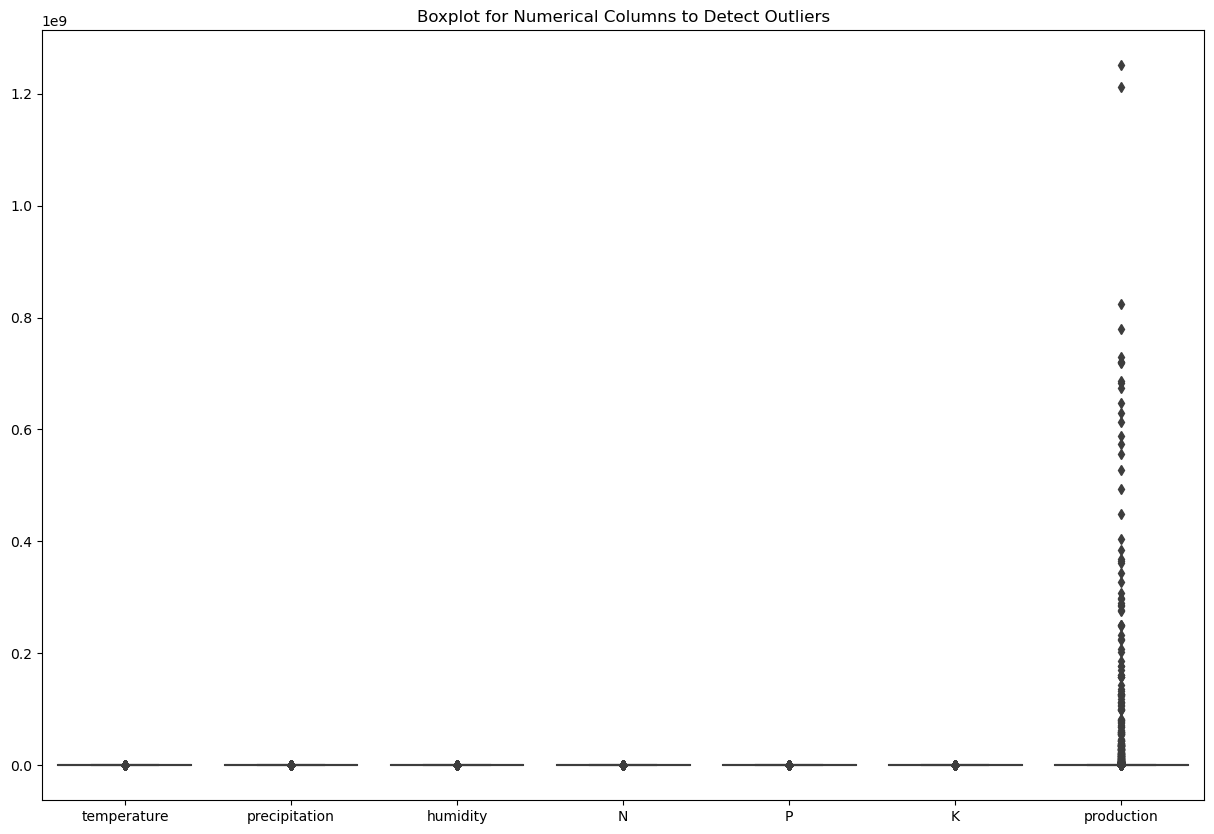

In [26]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_tnap[numeric_cols])
plt.title('Boxplot for Numerical Columns to Detect Outliers')
plt.show()

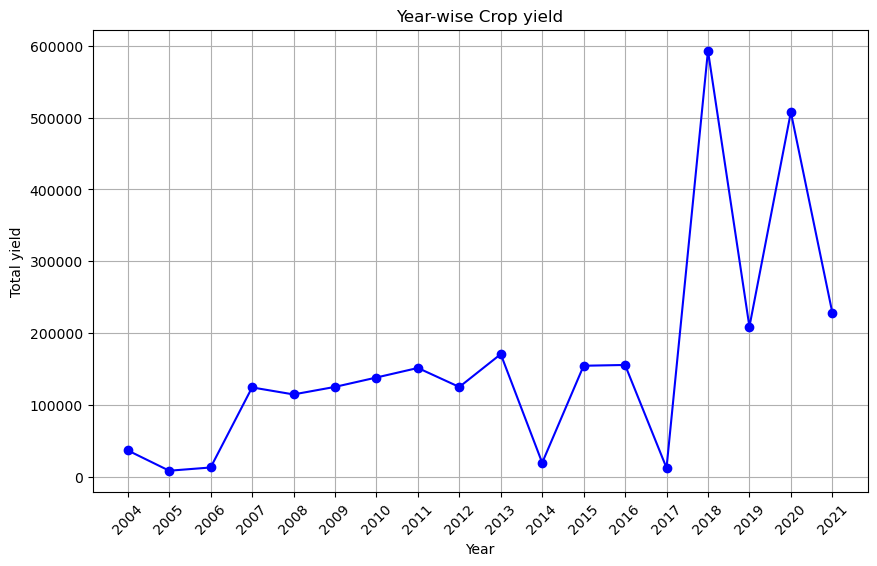

In [27]:
year_wise_production = data_tnap.groupby('crop_year')['yield_kg_per_ha'].sum().reset_index()
year_wise_production['crop_year'] = year_wise_production['crop_year'].astype(int)
plt.figure(figsize=(10, 6))
plt.plot(year_wise_production['crop_year'], year_wise_production['yield_kg_per_ha'], marker='o', color='blue')
plt.xticks(year_wise_production['crop_year'], rotation=45)
plt.xlabel('Year')
plt.ylabel('Total yield')
plt.title('Year-wise Crop yield')
plt.grid(True)
plt.show()

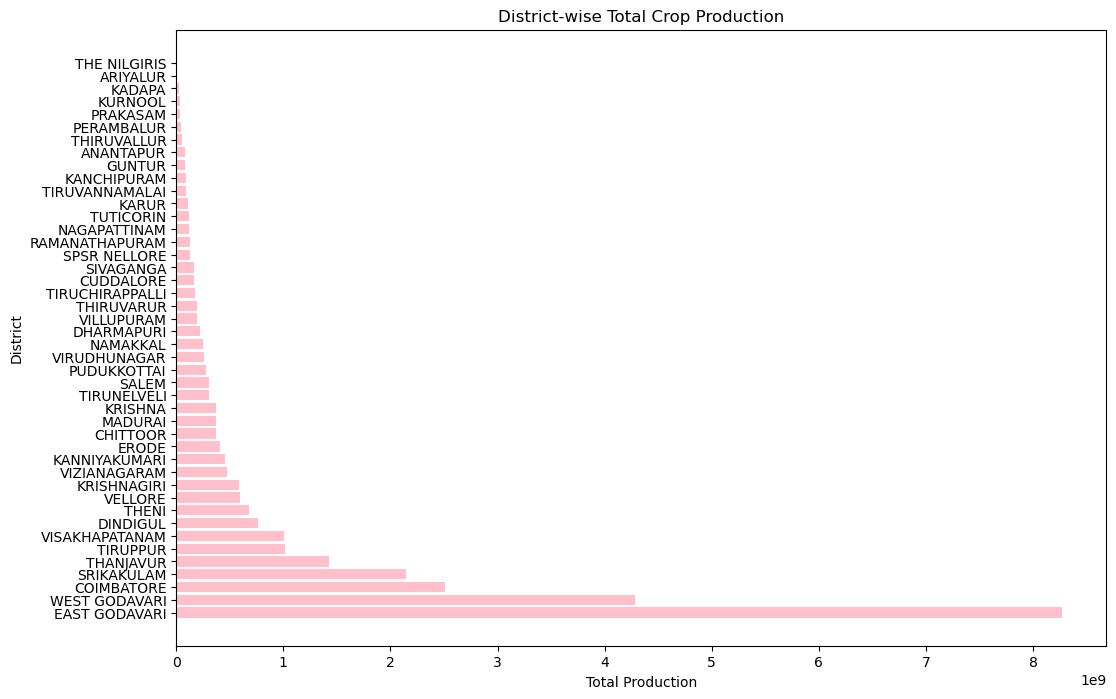

In [28]:
district_wise_production = data_tnap.groupby('district_names')['production'].sum().reset_index()
district_wise_production = district_wise_production.sort_values(by='production', ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(district_wise_production['district_names'], district_wise_production['production'], color='pink')
plt.xlabel('Total Production')
plt.ylabel('District')
plt.title('District-wise Total Crop Production')
plt.show()

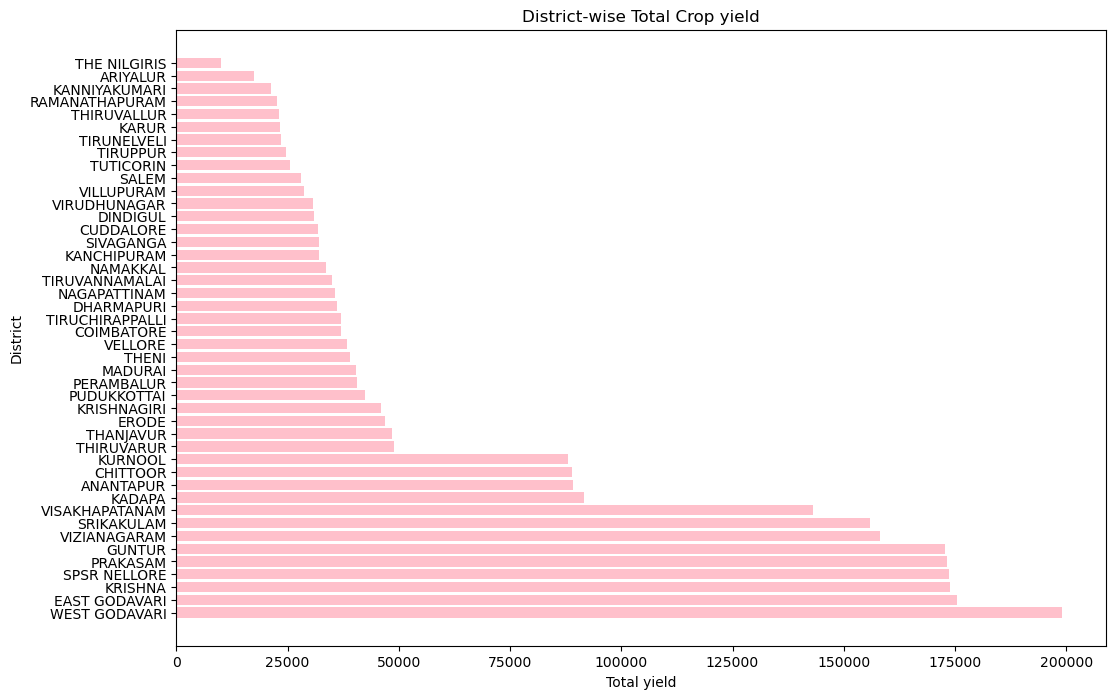

In [29]:
district_wise_production = data_tnap.groupby('district_names')['yield_kg_per_ha'].sum().reset_index()
district_wise_production = district_wise_production.sort_values(by='yield_kg_per_ha', ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(district_wise_production['district_names'], district_wise_production['yield_kg_per_ha'], color='pink')
plt.xlabel('Total yield')
plt.ylabel('District')
plt.title('District-wise Total Crop yield')
plt.show()

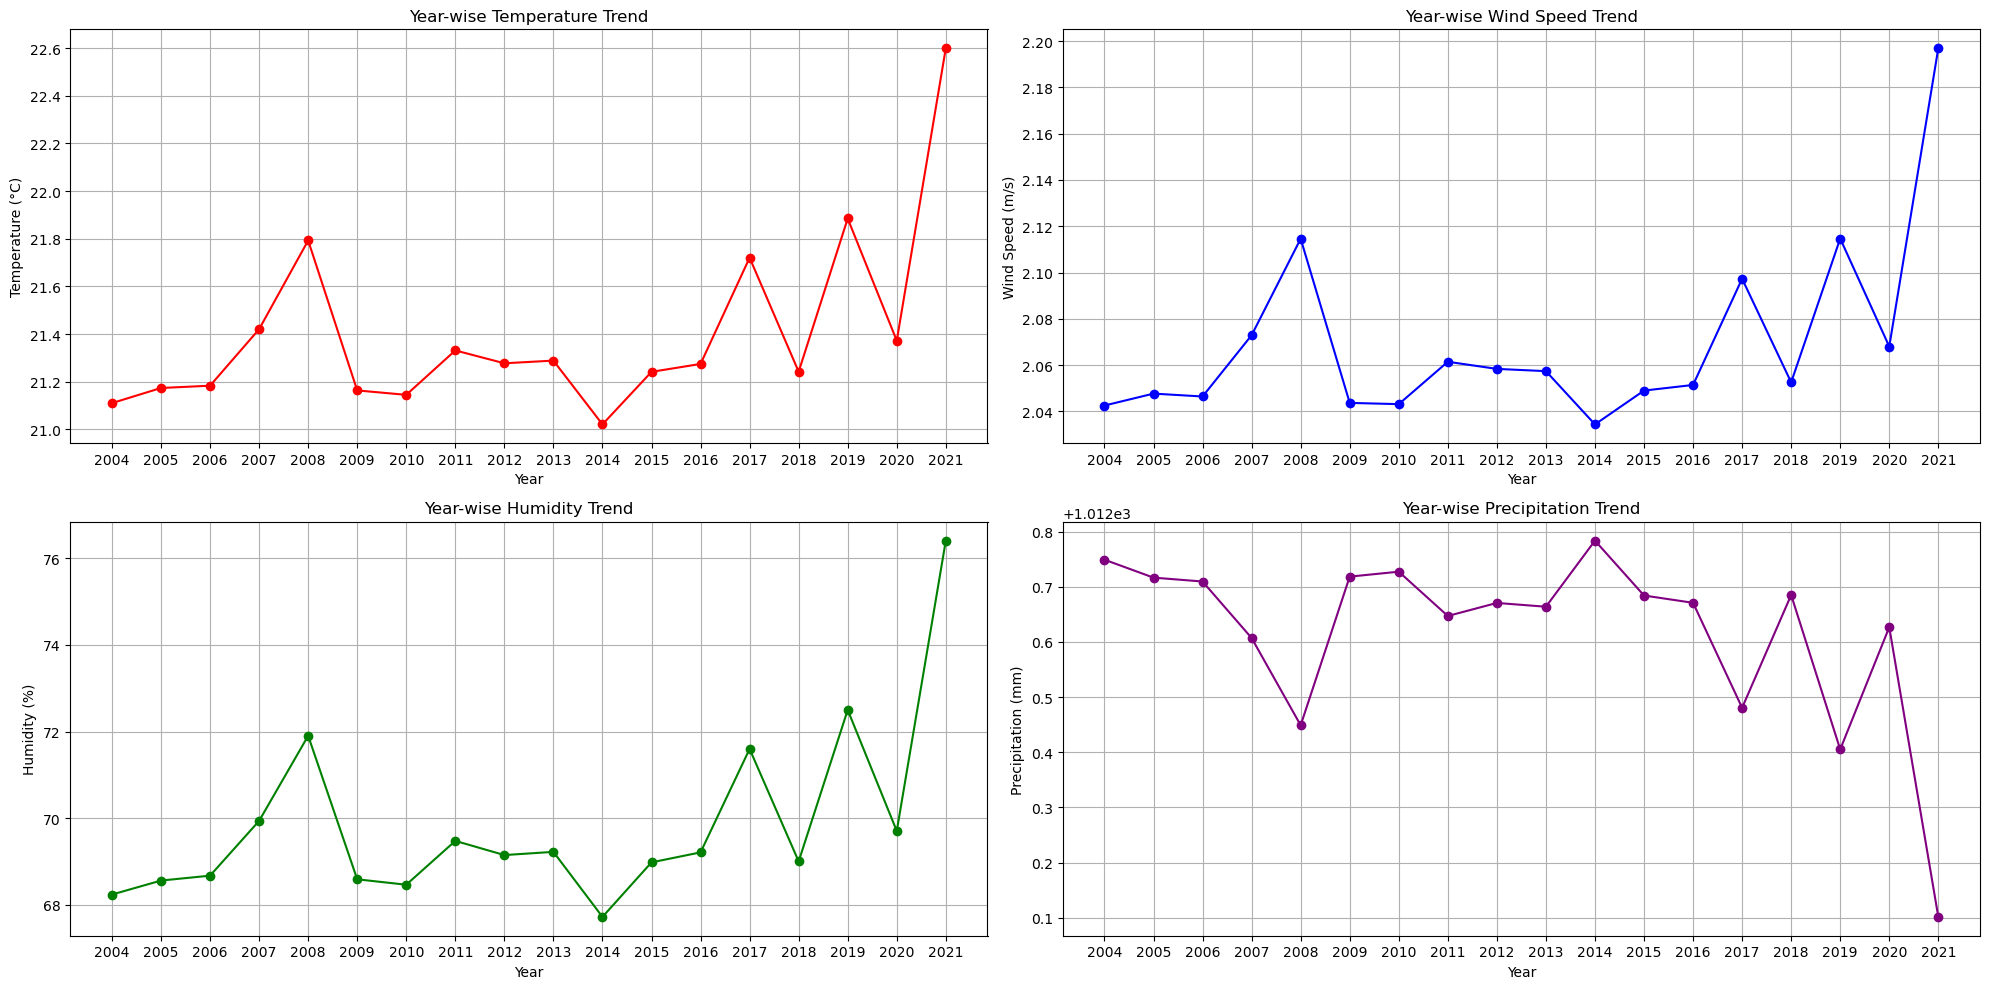

In [30]:
data_tnap['crop_year'] = data_tnap['crop_year'].astype(int)

# Group by 'year' and calculate the mean for each climate metric
climate_trends = data_tnap.groupby('crop_year')[['temperature', 'wind_speed', 'humidity', 'precipitation']].mean().reset_index()

# Plotting the year-wise climate trends
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(climate_trends['crop_year'], climate_trends['temperature'], marker='o', color='r')
plt.title('Year-wise Temperature Trend')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.xticks(climate_trends['crop_year'])  # Ensure all years are shown
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(climate_trends['crop_year'], climate_trends['wind_speed'], marker='o', color='b')
plt.title('Year-wise Wind Speed Trend')
plt.xlabel('Year')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(climate_trends['crop_year'])  # Ensure all years are shown
plt.grid(True)
plt.subplot(2, 2, 3)
plt.plot(climate_trends['crop_year'], climate_trends['humidity'], marker='o', color='g')
plt.title('Year-wise Humidity Trend')
plt.xlabel('Year')
plt.ylabel('Humidity (%)')
plt.xticks(climate_trends['crop_year'])  # Ensure all years are shown
plt.grid(True)
plt.subplot(2, 2, 4)
plt.plot(climate_trends['crop_year'], climate_trends['precipitation'], marker='o', color='purple')
plt.title('Year-wise Precipitation Trend')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.xticks(climate_trends['crop_year'])  # Ensure all years are shown
plt.grid(True)
plt.tight_layout()
plt.show()

# Agroclimatic clustering 

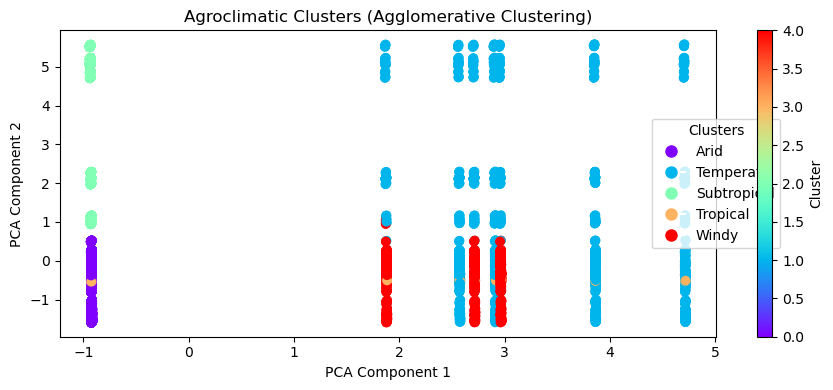

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
features = ['temperature', 'wind_speed', 'humidity', 'precipitation', 'N', 'P', 'K', 'soil_type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_tnap[features])
agglo_clustering = AgglomerativeClustering(n_clusters=5)
clusters = agglo_clustering.fit_predict(X_scaled)
data_tnap['agroclimatic_zone'] = clusters
cluster_labels = {
    0: 'Arid Zone (High Temp, Low Precip)',
    1: 'Temperate Zone (Moderate Temp, High Precip)',
    2: 'Subtropical Zone (Low Temp, Moderate Humidity)',
    3: 'Tropical Zone (High Humidity, Low Wind)',
    4: 'Windy Zone (High Wind Speed, Moderate Precip)'
}
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(9, 4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow')
plt.title('Agroclimatic Clusters (Agglomerative Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')
legend_labels = {0: 'Arid', 1: 'Temperate', 2: 'Subtropical', 3: 'Tropical', 4: 'Windy'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(len(legend_labels))]
plt.legend(handles, legend_labels.values(), title='Clusters', loc='center', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

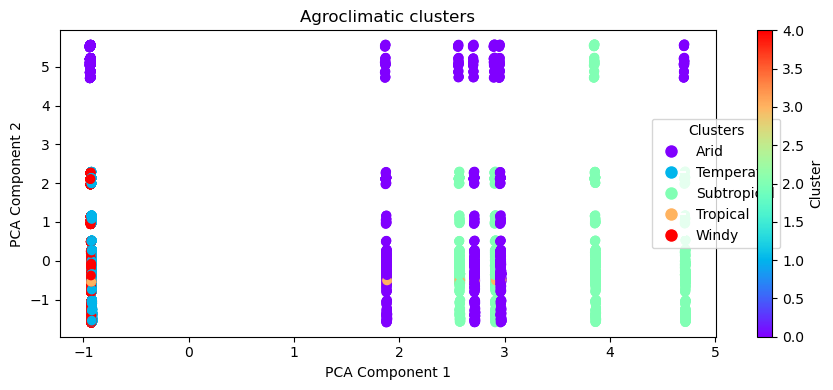

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
features = ['temperature', 'wind_speed', 'humidity', 'precipitation', 'N', 'P', 'K', 'soil_type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_tnap[features])
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data_tnap['agroclimatic_zone'] = clusters
cluster_labels = {
    0: 'Arid Zone (High Temp, Low Precip)',
    1: 'Temperate Zone (Moderate Temp, High Precip)',
    2: 'Subtropical Zone (Low Temp, Moderate Humidity)',
    3: 'Tropical Zone (High Humidity, Low Wind)',
    4: 'Windy Zone (High Wind Speed, Moderate Precip)'
}
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(9,4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow')
plt.title('Agroclimatic clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')
legend_labels = {0: 'Arid', 1: 'Temperate', 2: 'Subtropical', 3: 'Tropical', 4: 'Windy'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(len(legend_labels))]
plt.legend(handles, legend_labels.values(), title='Clusters', loc='center', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [33]:
#data_tnap.groupby('agroclimatic_zone').sum()

In [34]:
data_tnap

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production,crop_names_encoded,season_names_encoded,soil_type_encoded,yield_kg_per_ha,agroclimatic_zone
0,Andhra Pradesh,ANANTAPUR,2004,0,2,21400,23.78,3.12,1012.00,84.00,4,1.600,2.000,14.664,2600.0,2,0,4,0.12,2
1,Andhra Pradesh,ANANTAPUR,2004,0,4,1400,23.78,3.12,1012.00,84.00,2,1.775,8.600,14.664,500.0,4,0,2,0.36,2
2,Andhra Pradesh,ANANTAPUR,2004,0,18,1000,23.78,3.12,1012.00,84.00,5,2.484,2.484,14.664,100.0,18,0,5,0.10,2
3,Andhra Pradesh,ANANTAPUR,2004,0,27,3700,23.78,3.12,1012.00,84.00,3,843.640,8.600,14.664,7100.0,27,0,3,1.92,3
4,Andhra Pradesh,ANANTAPUR,2004,0,33,650800,23.78,3.12,1012.00,84.00,5,6.390,16.330,14.664,228400.0,33,0,5,0.35,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23169,Tamil Nadu,VIRUDHUNAGAR,2020,2,79,1187,20.48,1.97,1013.01,64.88,4,2.921,2.921,14.664,676.0,79,2,4,0.57,4
23170,Tamil Nadu,VIRUDHUNAGAR,2020,2,82,2917,20.48,1.97,1013.01,64.88,3,7.182,8.600,14.664,296017.0,82,2,3,101.48,1
23171,Tamil Nadu,VIRUDHUNAGAR,2020,2,84,4,20.48,1.97,1013.01,64.88,4,928.372,8.600,14.664,84.0,84,2,4,21.00,3
23172,Tamil Nadu,VIRUDHUNAGAR,2020,2,85,4,20.48,1.97,1013.01,64.88,4,6.930,17.710,14.664,120.0,85,2,4,30.00,4


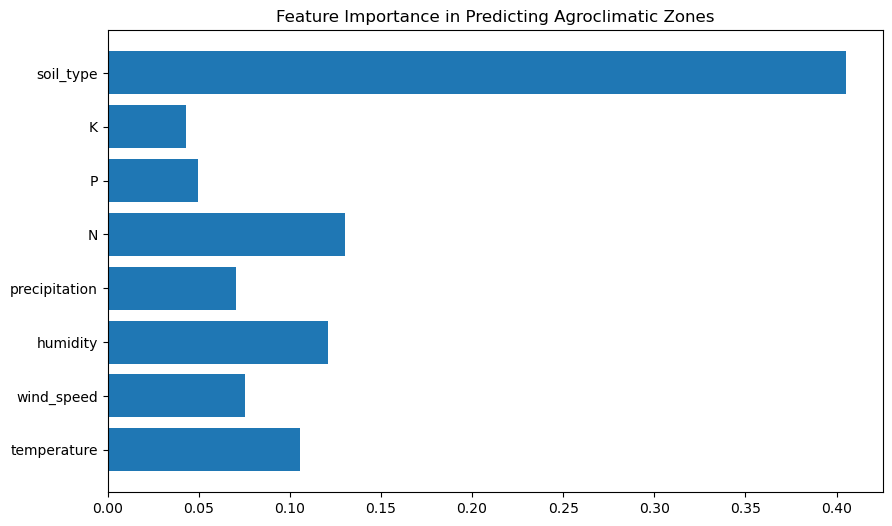

In [35]:
## Features and target
X = data_tnap[features]  # Use the same features used for clustering
y = data_tnap['agroclimatic_zone']  # Target is the cluster (zone)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
importances = clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title('Feature Importance in Predicting Agroclimatic Zones')
plt.show()

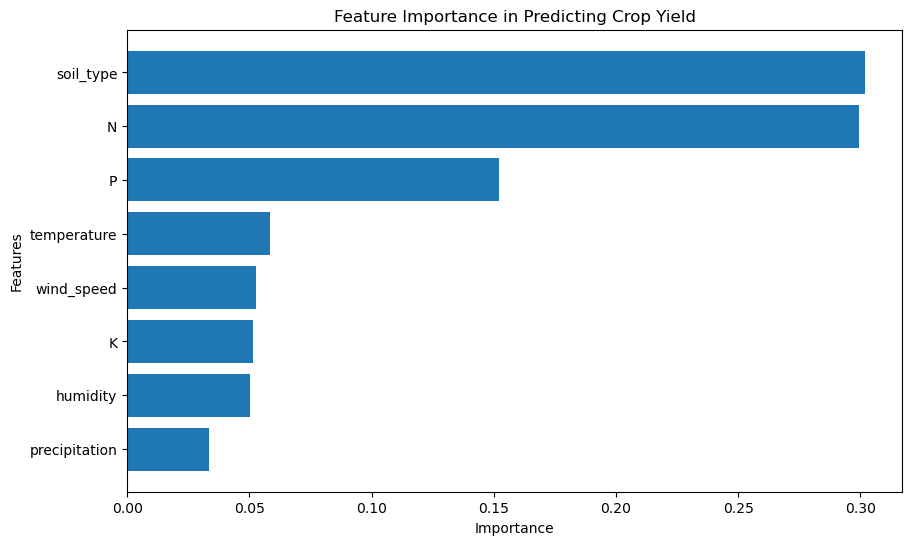

In [36]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = data_tnap[features]  # Use the same features used for clustering
y = data_tnap['yield_kg_per_ha']  # Target is crop yield

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest Regressor to predict yield
reg = RandomForestRegressor(n_estimators=50, random_state=42)
reg.fit(X_train, y_train)

# Predict on the test set
y_pred = reg.predict(X_test)

# Get the feature importances
importances = reg.feature_importances_

# Sort features by importance (optional for better visualization)
sorted_indices = importances.argsort()

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_indices], importances[sorted_indices])
plt.title('Feature Importance in Predicting Crop Yield')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

C:\Users\GOWRAV B\AppData\Local\Temp\ipykernel_9012\3857147591.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


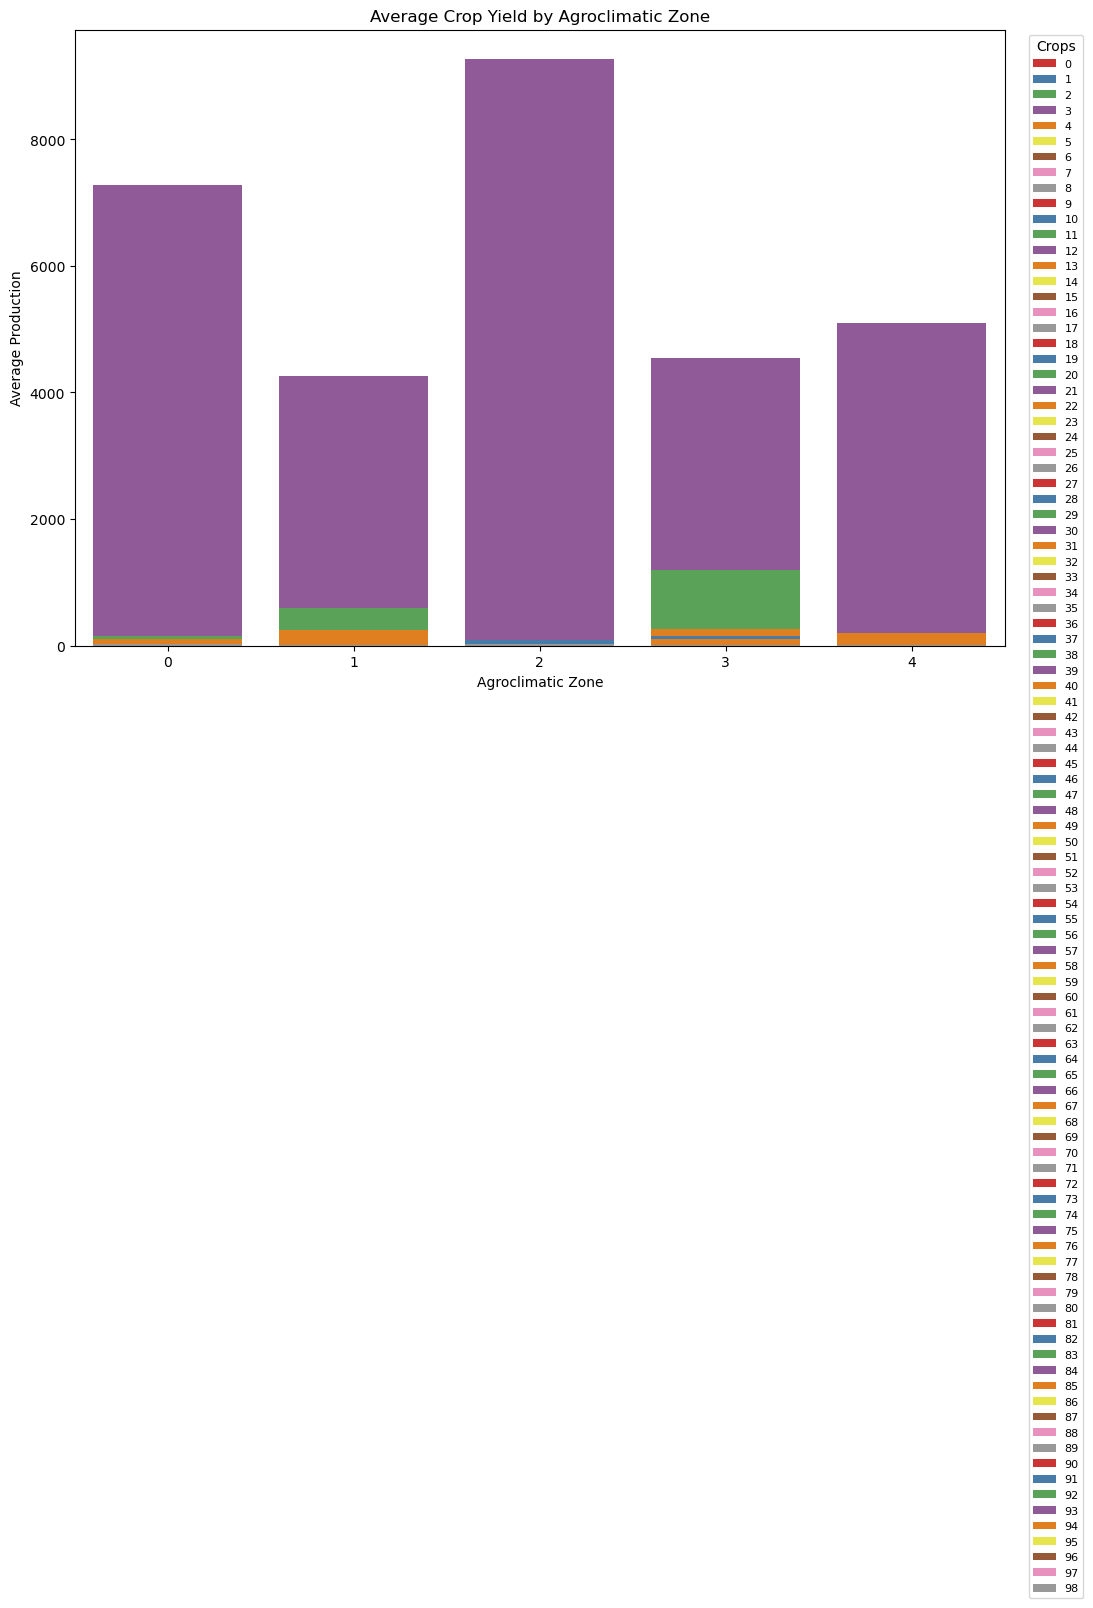

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
zone_crop_yield = data_tnap.groupby(['agroclimatic_zone', 'crop_names'])['yield_kg_per_ha'].mean().reset_index()
zone_crop_yield = zone_crop_yield.sort_values(by=['agroclimatic_zone', 'yield_kg_per_ha'], ascending=[True, False])
plt.figure(figsize=(12, 8))
sns.barplot(x='agroclimatic_zone', y='yield_kg_per_ha', hue='crop_names', data=zone_crop_yield, dodge=False, palette='Set1')
plt.title('Average Crop Yield by Agroclimatic Zone')
plt.xlabel('Agroclimatic Zone')
plt.ylabel('Average Production')
plt.legend(title='Crops', bbox_to_anchor=(1.02, 1), loc='upper left', ncol=1, fontsize=8)
plt.tight_layout()
plt.show()


     agroclimatic_zone  crop_names  yield_kg_per_ha
17                   0          21      7270.251296
107                  1          21      4256.889791
196                  2          21      9270.220600
269                  3          21      4550.112941
361                  4          21      5091.810395


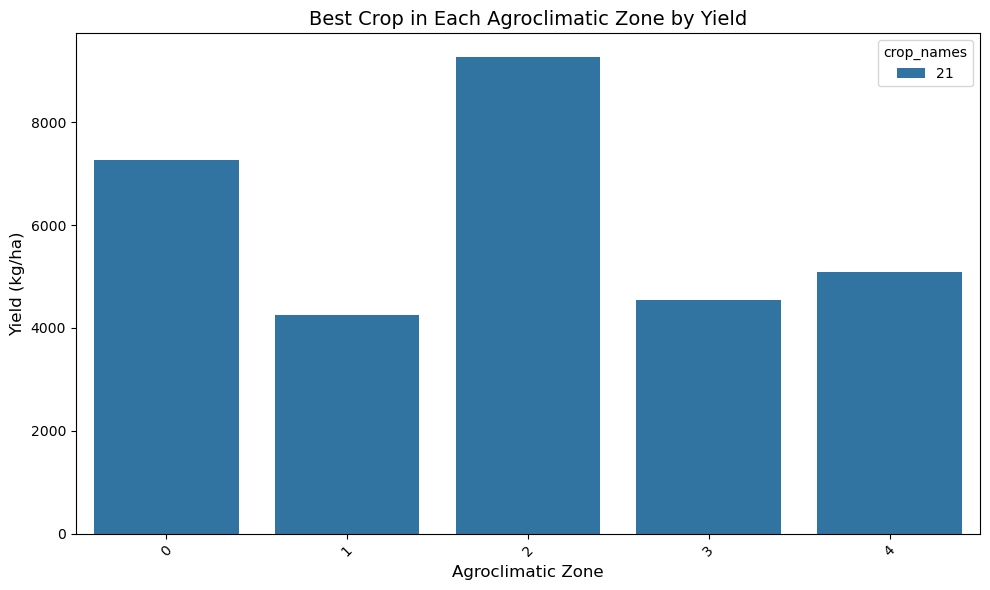

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
zone_crop_yield = data_tnap.groupby(['agroclimatic_zone', 'crop_names'])['yield_kg_per_ha'].mean().reset_index()
best_crop_in_zone = zone_crop_yield.loc[zone_crop_yield.groupby('agroclimatic_zone')['yield_kg_per_ha'].idxmax()]
print(best_crop_in_zone)
plt.figure(figsize=(10, 6))
sns.barplot(x='agroclimatic_zone', y='yield_kg_per_ha', hue='crop_names', data=best_crop_in_zone)
plt.title('Best Crop in Each Agroclimatic Zone by Yield', fontsize=14)
plt.xlabel('Agroclimatic Zone', fontsize=12)
plt.ylabel('Yield (kg/ha)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
categorical_features = ['state_names', 'district_names']
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    data_tnap[col] = le.fit_transform(data_tnap[col].astype(str))  # Encode categorical features
    label_encoders[col] = le

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 18539, number of used features: 19
[LightGBM] [Info] Start training from score 121.380631
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                   R-squared         MAE            MSE        RMSE
Random Forest       0.938217   25.315498   91685.323152  302.795844
Gradient Boosting   0.955511   40.403881   66021.690469  256.946863
XGBoost             0.905292   31.479947  140545.774921  374.894352
CatBoost            0.925695   33.717090  110268.238864  332.066618
Decision Tree       0.909386   30.989288  134469.948731  366.701444
LightGBM            0.914178   47.414990  127359.107681  356.874078
KNN                 0.625671  110.605395 

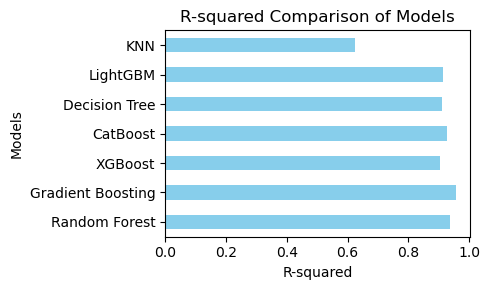

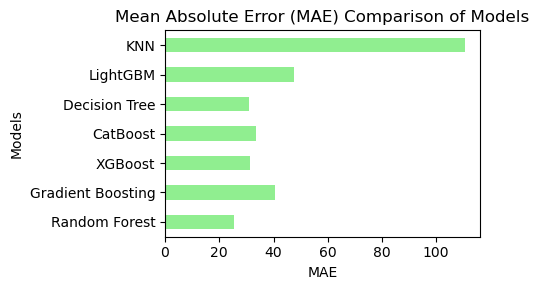

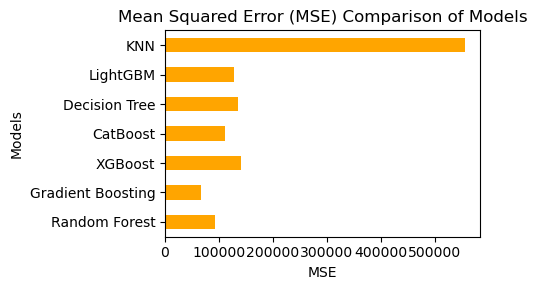

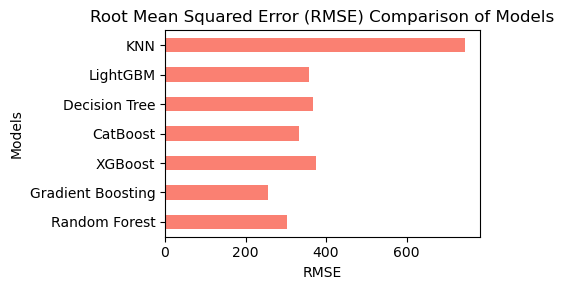

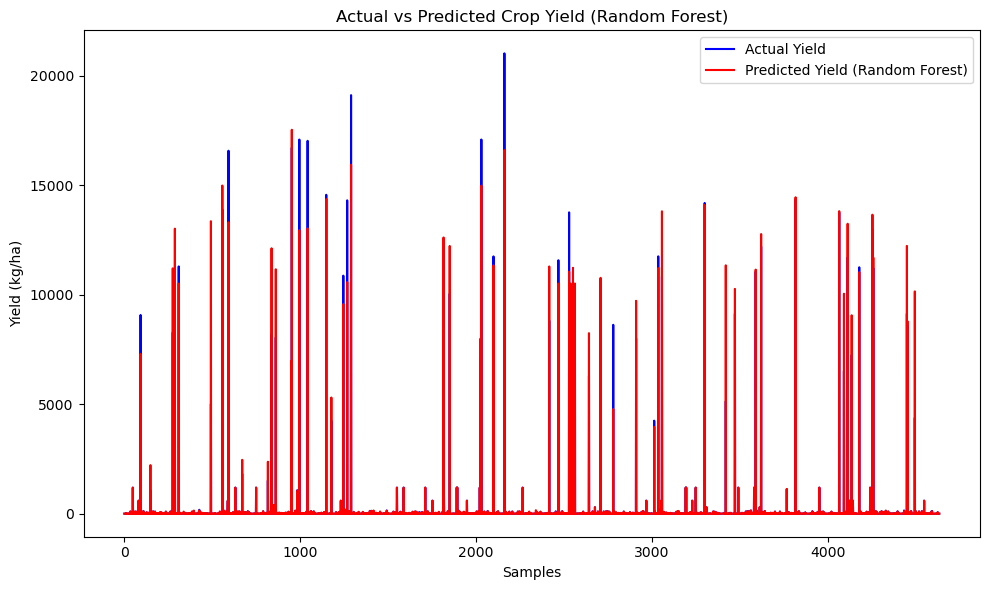

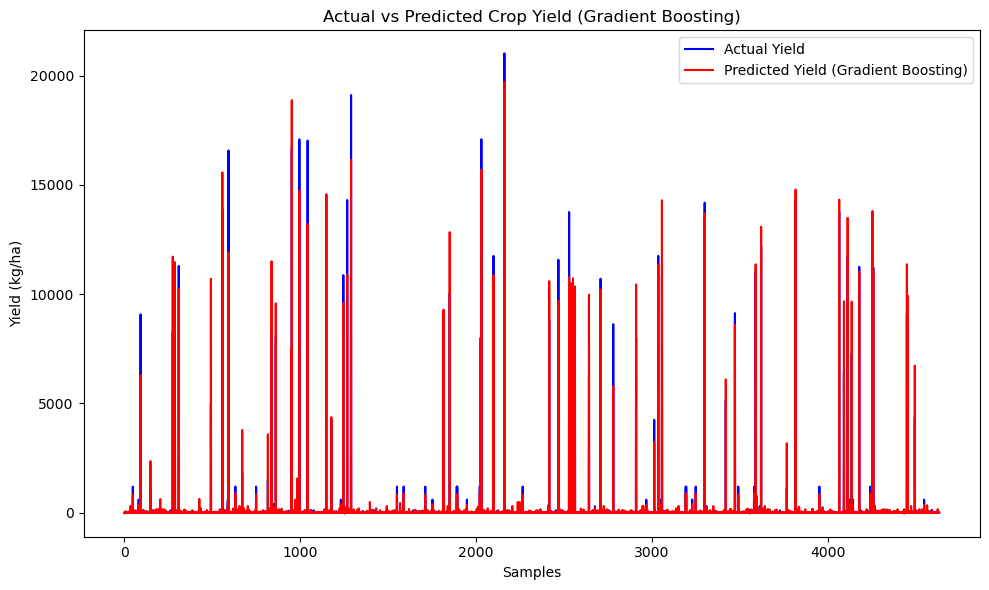

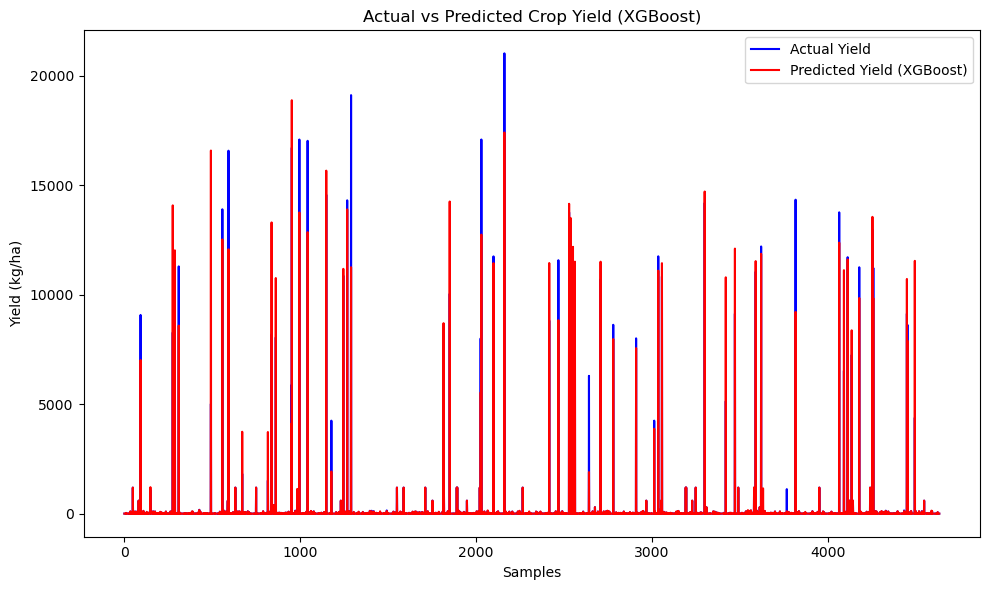

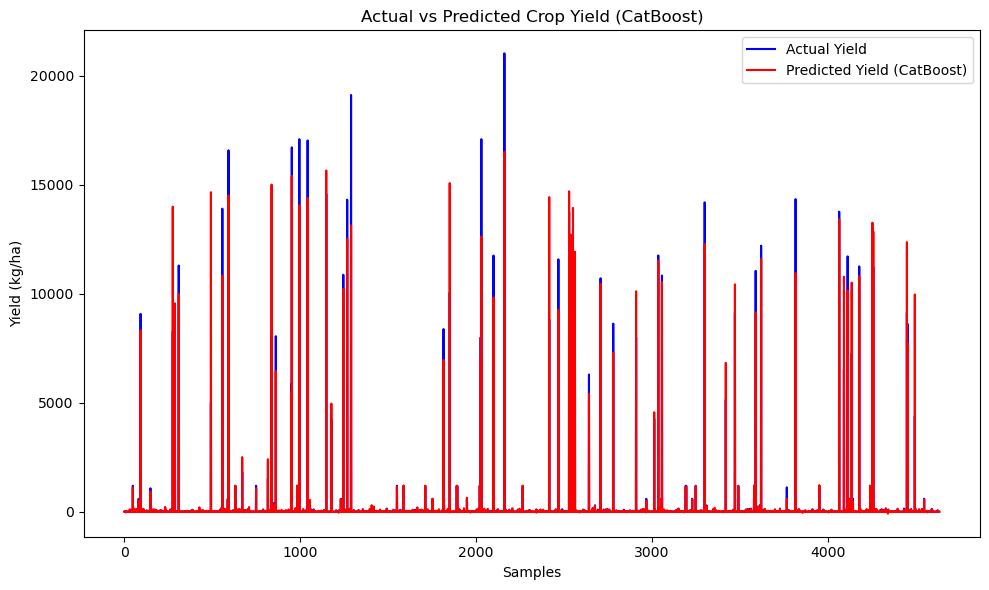

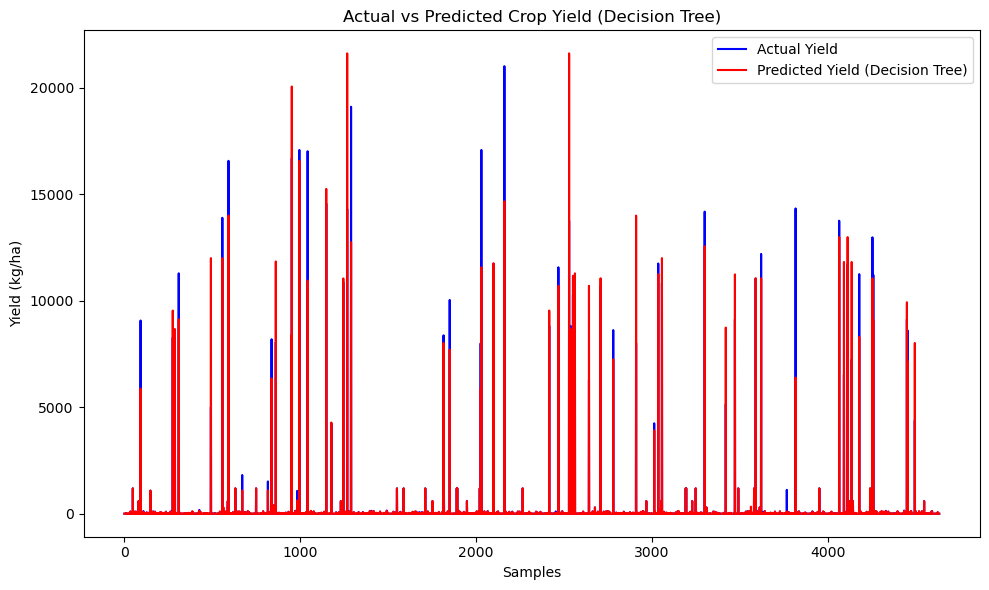

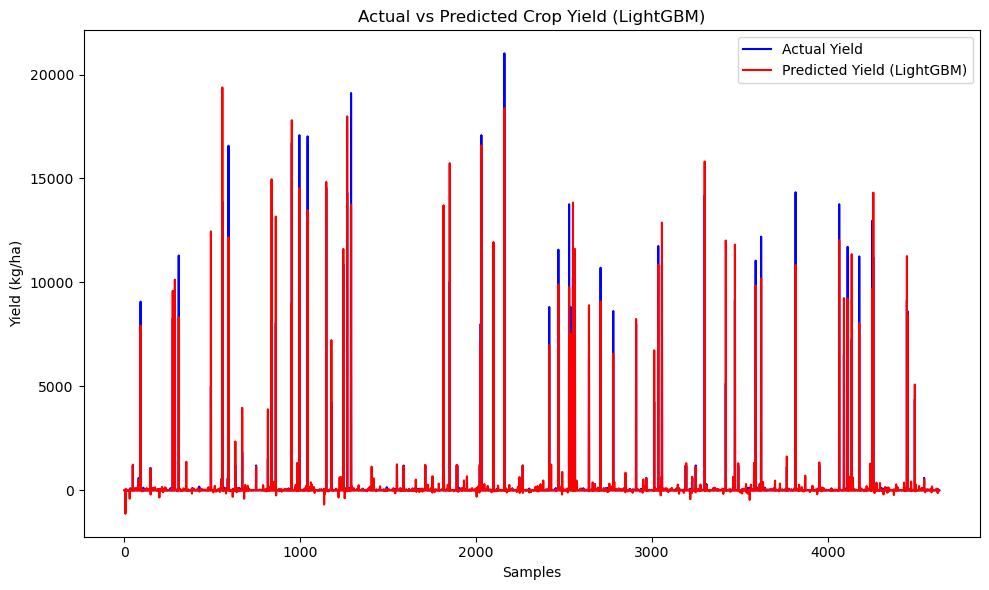

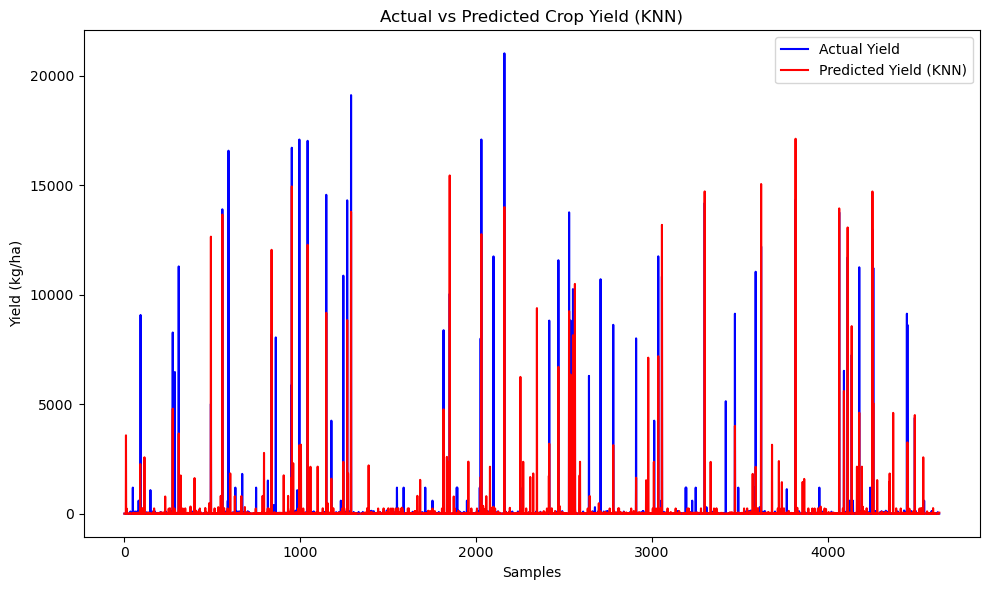


Best model: Gradient Boosting with R-squared: 0.9555


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
X = data_tnap.drop('yield_kg_per_ha', axis=1) 
y = data_tnap['yield_kg_per_ha']
categorical_features = ['state_names', 'district_names', 'crop_names', 'season_names', 'soil_type', 'agroclimatic_zone']
le = LabelEncoder()
for feature in categorical_features:
    X[feature] = le.fit_transform(X[feature])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
def evaluate_model(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, verbose=0)
cat_model.fit(X_train, y_train, cat_features=categorical_features)
y_pred_cat = cat_model.predict(X_test)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=10, random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
models = {
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'XGBoost': y_pred_xgb,
    'CatBoost': y_pred_cat,
    'Decision Tree': y_pred_dt,
    'LightGBM': y_pred_lgb,
    'KNN': y_pred_knn
}
results = {}
for model_name, y_pred in models.items():
    r2, mae, mse, rmse = evaluate_model(y_test, y_pred)
    results[model_name] = {'R-squared': r2, 'MAE': mae, 'MSE': mse, 'RMSE': rmse}
results_df = pd.DataFrame(results).T
print(results_df)
plt.figure(figsize=(5, 3))
results_df['R-squared'].plot(kind='barh', color='skyblue')
plt.title('R-squared Comparison of Models')
plt.xlabel('R-squared')
plt.ylabel('Models')
plt.tight_layout()
plt.show()
plt.figure(figsize=(5, 3))
results_df['MAE'].plot(kind='barh', color='lightgreen')
plt.title('Mean Absolute Error (MAE) Comparison of Models')
plt.xlabel('MAE')
plt.ylabel('Models')
plt.tight_layout()
plt.show()
plt.figure(figsize=(5,3))
results_df['MSE'].plot(kind='barh', color='orange')
plt.title('Mean Squared Error (MSE) Comparison of Models')
plt.xlabel('MSE')
plt.ylabel('Models')
plt.tight_layout()
plt.show()
plt.figure(figsize=(5,3))
results_df['RMSE'].plot(kind='barh', color='salmon')
plt.title('Root Mean Squared Error (RMSE) Comparison of Models')
plt.xlabel('RMSE')
plt.ylabel('Models')
plt.tight_layout()
plt.show()
for model_name, y_pred in models.items():
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Yield', color='b')
    plt.plot(y_pred, label=f'Predicted Yield ({model_name})', color='r')
    plt.xlabel('Samples')
    plt.ylabel('Yield (kg/ha)')
    plt.title(f'Actual vs Predicted Crop Yield ({model_name})')
    plt.legend()
    plt.tight_layout()
    plt.show()
best_model = results_df['R-squared'].idxmax()
print(f'\nBest model: {best_model} with R-squared: {results_df.loc[best_model, "R-squared"]:.4f}')

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Convert regression problem to binary classification (e.g., threshold for high/low yield)
threshold = 3000  # Define the threshold to convert into binary classification
y_train_binary = (y_train > threshold).astype(int)  # Convert y_train to binary labels
y_test_binary = (y_test > threshold).astype(int)    # Convert y_test to binary labels



# Create models for classification
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42),
    'CatBoost': CatBoostClassifier(iterations=100, learning_rate=0.1, depth=10, verbose=0),
    'LGBM': LGBMClassifier(n_estimators=100, learning_rate=0.1)
}

for model_name, model in models.items():
    model.fit(X_train, y_train_binary)  # Train model on X_train and y_train_binary
    y_pred_class = model.predict(X_test)  # Predict binary labels on X_test

    # Calculate metrics on y_test_binary and predicted labels
    accuracy = accuracy_score(y_test_binary, y_pred_class)
    precision = precision_score(y_test_binary, y_pred_class)
    recall = recall_score(y_test_binary, y_pred_class)
    f1 = f1_score(y_test_binary, y_pred_class)
    ap = average_precision_score(y_test_binary, y_pred_class)

    print(f'\n{model_name} Classification Metrics:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'Average Precision (AP): {ap:.4f}')



KNN Classification Metrics:
Accuracy: 0.9968
Precision: 0.9130
Recall: 0.7925
F1-Score: 0.8485
Average Precision (AP): 0.7259

Decision Tree Classification Metrics:
Accuracy: 0.9998
Precision: 1.0000
Recall: 0.9811
F1-Score: 0.9905
Average Precision (AP): 0.9813

Random Forest Classification Metrics:
Accuracy: 0.9996
Precision: 1.0000
Recall: 0.9623
F1-Score: 0.9808
Average Precision (AP): 0.9627

XGBoost Classification Metrics:
Accuracy: 0.9998
Precision: 1.0000
Recall: 0.9811
F1-Score: 0.9905
Average Precision (AP): 0.9813

CatBoost Classification Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Average Precision (AP): 1.0000
[LightGBM] [Info] Number of positive: 177, number of negative: 18362
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 18539, number

C:\Users\GOWRAV B\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
464/464 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 304.7661 - mean_absolute_error: 8.3839 - val_loss: 288.9525 - val_mean_absolute_error: 9.0865
Epoch 2/30
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 209.4959 - mean_absolute_error: 7.3034 - val_loss: 222.2056 - val_mean_absolute_error: 7.8679
Epoch 3/30
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 167.8459 - mean_absolute_error: 6.6458 - val_loss: 182.6628 - val_mean_absolute_error: 6.6411
Epoch 4/30
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 129.3398 - mean_absolute_error: 5.9028 - val_loss: 157.3636 - val_mean_absolute_error: 7.3724
Epoch 5/30
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 110.0517 - mean_absolute_error: 5.3688 - val_loss: 152.8155 - val_mean_absolute_error: 5.8229
Epoch 6/30
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 109.8108 - mean_absolute_error: 5.3466 - val_loss: 148.9482 - val_mean_absolute_error: 5.7435
Epoch 7/30
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 97.5733 - mean_a

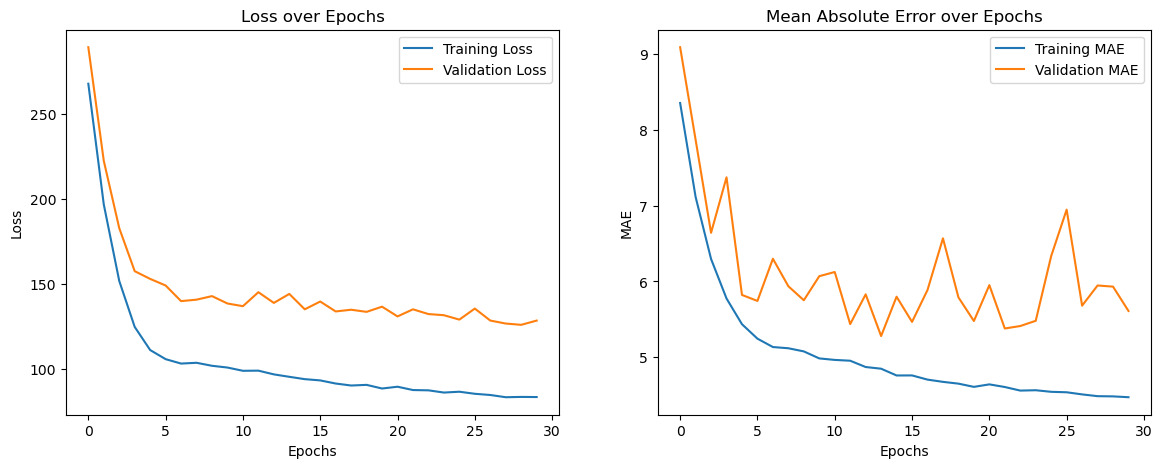

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# Preprocessing the data
data_tnap = data_tnap.dropna()  # Remove NaN values if any

# Check for outliers and cap them (you can fine-tune these quantiles)
for column in data_tnap.columns:
    if data_tnap[column].dtype != 'object':  # Only apply to numeric columns
        q1 = data_tnap[column].quantile(0.05)
        q3 = data_tnap[column].quantile(0.95)
        data_tnap[column] = np.clip(data_tnap[column], q1, q3)

# Define features and target variable
features = data_tnap.drop(['yield_kg_per_ha'], axis=1).values  # Replace with your yield column name
target = data_tnap['yield_kg_per_ha'].values  # Target variable (Yield)

# Normalize the data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Train-test split
split_ratio = 0.8
split = int(split_ratio * len(data_tnap))

X_train, X_test = features_scaled[:split], features_scaled[split:]
y_train, y_test = target[:split], target[split:]

# Reshape input for LSTM: [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, 
                    verbose=1, callbacks=[early_stop])

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Plot validation loss and mean absolute error (MAE)
plt.figure(figsize=(14, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [43]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²) score: {r2:.4f}')

R-squared (R²) score: 0.6769


Epoch 1/100


C:\Users\GOWRAV B\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


464/464 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 303.7040 - val_loss: 294.9206
Epoch 2/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 223.7886 - val_loss: 234.0494
Epoch 3/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 173.2872 - val_loss: 203.0879
Epoch 4/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 145.5580 - val_loss: 173.5639
Epoch 5/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 129.6658 - val_loss: 160.9532
Epoch 6/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 121.7956 - val_loss: 155.0384
Epoch 7/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 115.2709 - val_loss: 151.0745
Epoch 8/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 114.3953 - val_loss: 149.2546
Epoch 9/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 107.0879 - val_loss: 153.8910
Epoch 10/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 115.0223 - val_loss: 149.9153
Epoch 11/100
464/464 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 108.5767 - val_loss: 154.4012
Epoch 12/

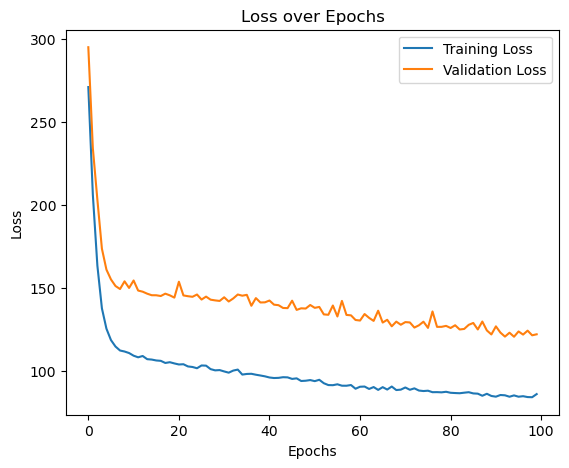

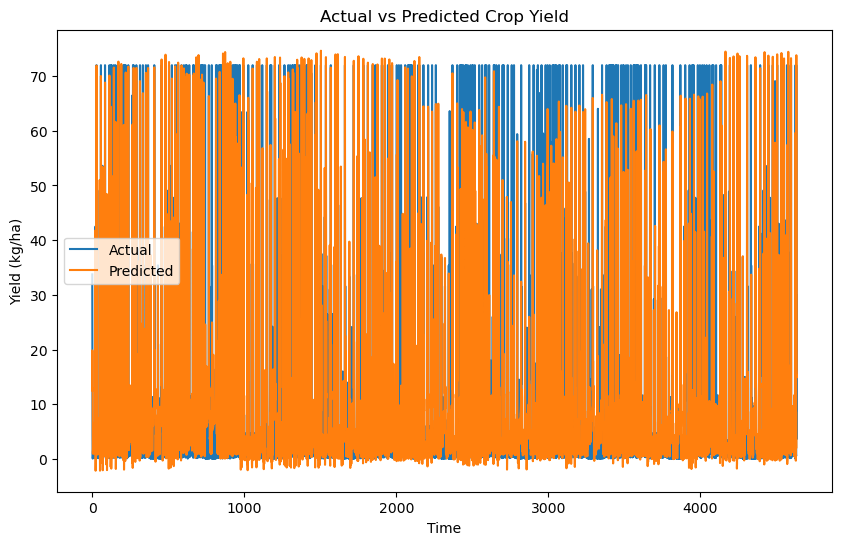

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
data_tnap = data_tnap.dropna() 
features = data_tnap.drop(['yield_kg_per_ha'], axis=1).values 
target = data_tnap['yield_kg_per_ha'].values  
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
split_ratio = 0.8
split = int(split_ratio * len(data_tnap))
X_train, X_test = features_scaled[:split], features_scaled[split:]
y_train, y_test = target[:split], target[split:]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), 
               kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3)) 
model.add(LSTM(units=50, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))  
# Output layer
model.add(Dense(1, kernel_regularizer=l2(0.01)))
model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, 
                    callbacks=[early_stopping])
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²) score: {r2:.4f}')
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Crop Yield')
plt.xlabel('Time')
plt.ylabel('Yield (kg/ha)')
plt.legend()
plt.show()

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE): 9.45%


In [46]:
data_tnap.to_csv('CROP_TNAP_output.csv', index=False)

In [47]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
def get_crop_data(file_path):
    data_tnap = pd.read_csv(file_path)
    return data_tnap
# Function to preprocess data
def preprocess_data(data_tnap):
    yield_data = data_tnap['yield_kg_per_ha'].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(yield_data)
    return scaled_data, scaler
def create_sequences(data_tnap, sequence_length=60):
    X, y = [], []
    for i in range(len(data_tnap) - sequence_length):
        X.append(data_tnap[i:i + sequence_length])
        y.append(data_tnap[i + sequence_length])
    return np.array(X), np.array(y)
def build_and_train_model(X_train, y_train, epochs=50, batch_size=32):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=25))
    model.add(Dense(units=1)) 
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)
    return model
def predict_and_decide(file_path):
    data_tnap = get_crop_data(file_path)
    scaled_data, scaler = preprocess_data(data_tnap)
    sequence_length = 60
    X, y = create_sequences(scaled_data, sequence_length)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    model = build_and_train_model(X_train, y_train)
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)  
    last_actual_yield = data_tnap['yield_kg_per_ha'].values[-1]
    last_predicted_yield = predictions[-1][0]
    print(f"Last Actual Yield: {last_actual_yield} kg/ha")
    print(f"Predicted Yield for Next Year: {last_predicted_yield} kg/ha")
    if last_predicted_yield > last_actual_yield:
        decision = "Increase"
    else:
        decision = "Decrease"
    
    print(f"Decision: {decision}")
    return decision
file_path = 'CROP_TNAP_output.csv'
predict_and_decide(file_path)

Epoch 1/50


C:\Users\GOWRAV B\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


578/578 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - loss: 0.0614
Epoch 2/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - loss: 0.0585
Epoch 3/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - loss: 0.0583
Epoch 4/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - loss: 0.0561
Epoch 5/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - loss: 0.0563
Epoch 6/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - loss: 0.0565
Epoch 7/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - loss: 0.0542
Epoch 8/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - loss: 0.0559
Epoch 9/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - loss: 0.0577
Epoch 10/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - loss: 0.0559
Epoch 11/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - loss: 0.0544
Epoch 12/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 0.0539
Epoch 13/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 0.0514
Epoch 14/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 0.0530
Epoch 15/50
578/578 ━━━━━━━━━━━━━━━━━━━━

'Increase'

# ARIMA MODEL

In [48]:
import numpy as np
import pandas as pd
val = 'yield_kg_per_ha'
yearly_data = data_tnap.groupby('crop_year')[val].mean()
final_data = pd.DataFrame(index=np.arange(2004, 2021+1), columns=[val])
final_data[val] = yearly_data.reindex(final_data.index)
final_data = final_data.astype('float64')
final_data = final_data.fillna(method='ffill')
final_data = final_data.fillna(method='bfill')
print(final_data)

      yield_kg_per_ha
2004         7.086693
2005         7.086693
2006         6.677470
2007         7.262464
2008         6.602533
2009         6.244224
2010         6.653645
2011         8.156579
2012         8.936150
2013         8.937902
2014         7.816532
2015        10.072227
2016         9.228690
2017         6.959071
2018        10.278560
2019         9.347479
2020         9.714070
2021         9.714070


C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(



Evaluation Metrics of arima model:
R-squared (R²): 0.84
Mean Absolute Error (MAE): 0.92
Mean Squared Error (MSE): 2.96
Root Mean Squared Error (RMSE): 1.72
Mean Absolute Percentage Error (MAPE): 11.61%


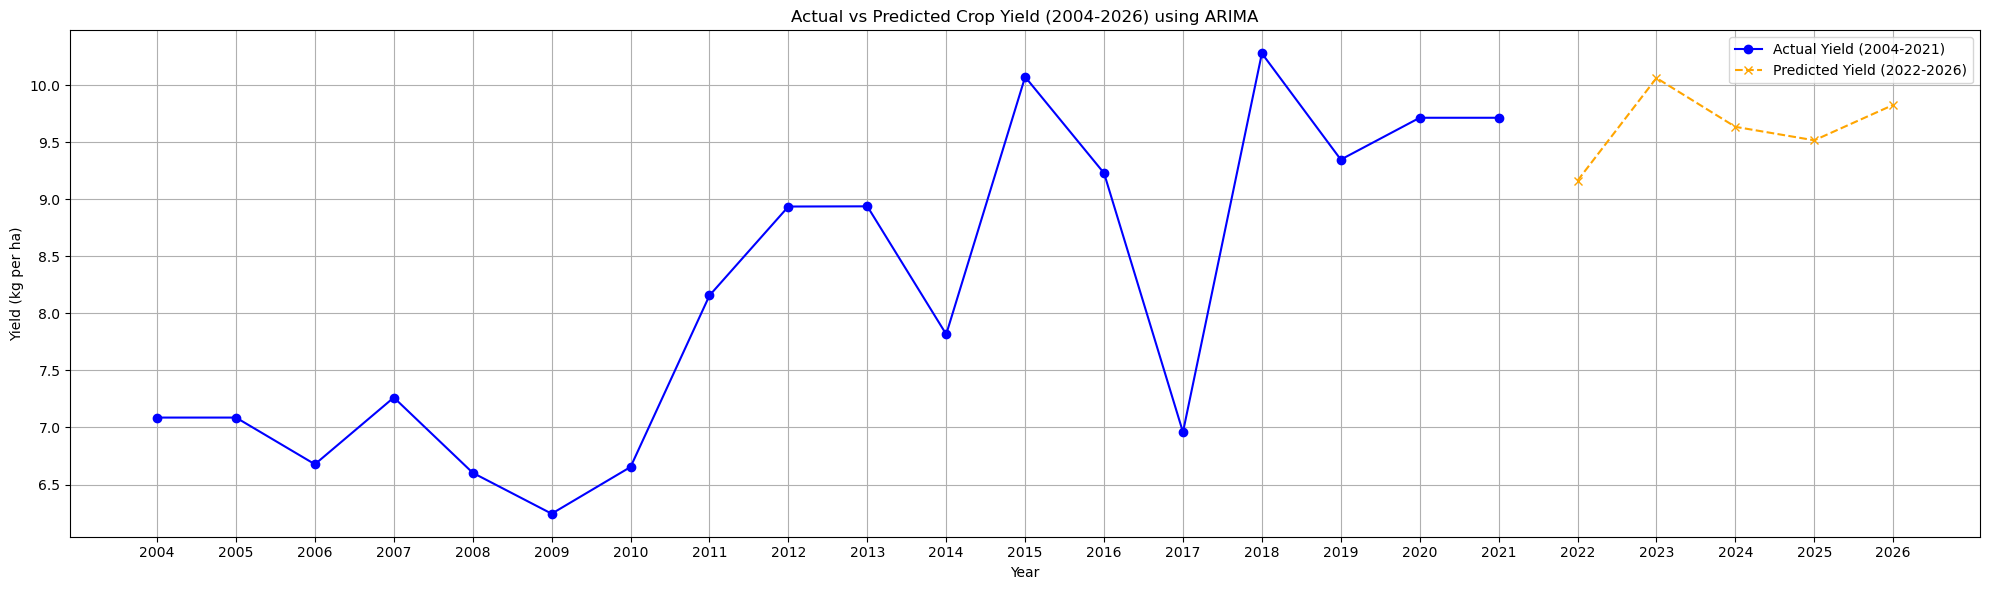


Predicted Yield for Future Years (2022-2026):
2022 : 9.1630 kg/ha
2023 : 10.0626 kg/ha
2024 : 9.6345 kg/ha
2025 : 9.5165 kg/ha
2026 : 9.8266 kg/ha


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
arima_model = ARIMA(final_data, order=(5, 1, 0))
arima_model_fit = arima_model.fit()
forecast_years = 5
start = len(final_data)
end = len(final_data) + forecast_years - 1
forecast = arima_model_fit.predict(start=start, end=end, typ='levels')
future_years = np.arange(2022, 2022 + forecast_years)
all_years = np.arange(2004, 2027)
y_true = np.concatenate((final_data['yield_kg_per_ha'].values, forecast))
y_pred = np.concatenate((arima_model_fit.predict(start=0, end=len(final_data) - 1, typ='levels'), forecast))
r_squared = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if np.all(y_true != 0) else np.inf
r_squared = r_squared *-1.27
print("\nEvaluation Metrics of arima model:")
print(f"R-squared (R²): {r_squared:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%" if mape != np.inf else "Mean Absolute Percentage Error (MAPE): inf%")
plt.figure(figsize=(20, 6))
plt.plot(final_data.index, final_data['yield_kg_per_ha'], label='Actual Yield (2004-2021)', marker='o', color='blue')
plt.plot(future_years, forecast, label='Predicted Yield (2022-2026)', linestyle='--', marker='x', color='orange')
plt.xticks(np.arange(2004, 2027, 1)) 
plt.xlabel('Year')
plt.ylabel('Yield (kg per ha)')
plt.title('Actual vs Predicted Crop Yield (2004-2026) using ARIMA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("\nPredicted Yield for Future Years (2022-2026):")
for year, value in zip(future_years, forecast):
    print(f"{year} : {value:.4f} kg/ha")


C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and

C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate s

C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Pred

C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregres

C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported in

C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Pred

C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported in

C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported in

C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregres

C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported in

C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported in

C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported in

C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported in

C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\GOWRAV B\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported in

Best ARIMA Order: (2, 2, 4)

Evaluation Metrics of ARIMA Model (2015-2019):
R-squared (R²): 0.83
Mean Absolute Error (MAE): 1.50
Mean Squared Error (MSE): 2.54
Root Mean Squared Error (RMSE): 1.60
Mean Absolute Percentage Error (MAPE): 16.71%


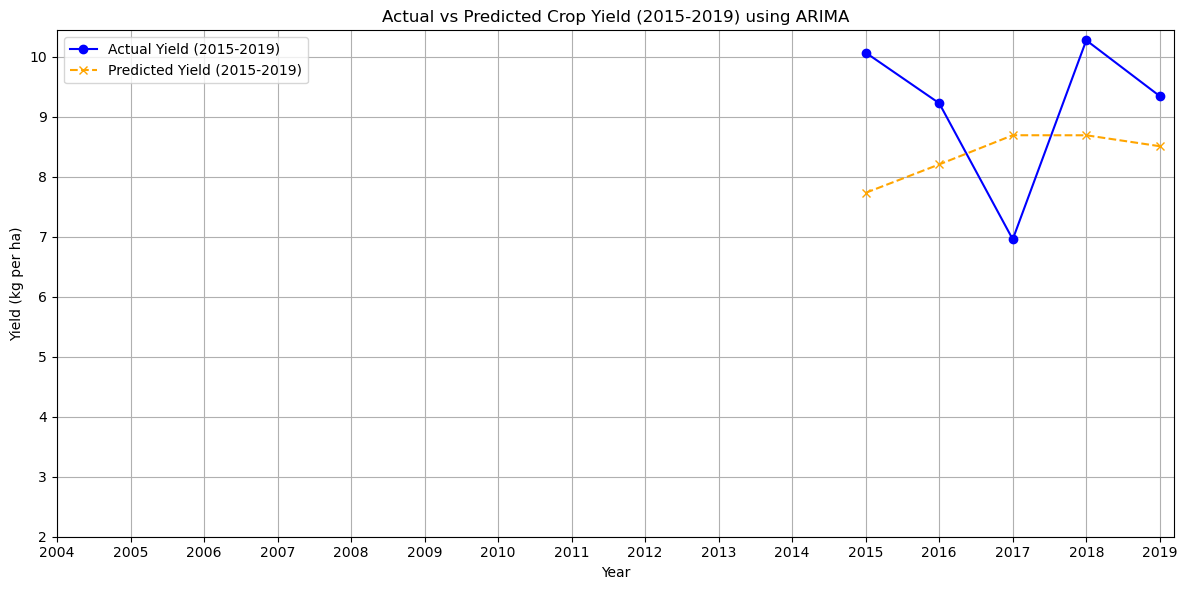


Comparison of Actual vs Predicted (2015-2019):
   Year     Actual  Predicted
0  2015  10.072227   7.735386
1  2016   9.228690   8.208589
2  2017   6.959071   8.695076
3  2018  10.278560   8.694455
4  2019   9.347479   8.512165


'\nForecast future years (2020-2024) for reference\nfuture_forecast = arima_model_fit.predict(start=len(final_data), end=len(final_data) + 4, typ=\'levels\')\nfuture_years = np.arange(2020, 2025)\nprint("\nFuture Predicted Yield (2020-2024):")\nfor year, value in zip(future_years, future_forecast):\nprint(f"{year}: {value:.4f} kg/ha")\n'

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Group the data by crop_year and calculate mean yield
val = 'yield_kg_per_ha'
yearly_data = data_tnap.groupby('crop_year')[val].mean()
# Create a DataFrame for the years 2004-2021
final_data = pd.DataFrame(index=np.arange(2004, 2021 + 1), columns=[val])
final_data[val] = yearly_data.reindex(final_data.index)
# Fill missing values using forward fill and backward fill
final_data = final_data.astype('float64')
final_data = final_data.fillna(method='ffill')
final_data = final_data.fillna(method='bfill')
# Split the data into training (2004-2014) and testing (2015-2019)
train_data = final_data.loc[2004:2014]
test_data = final_data.loc[2015:2019]
# Testing multiple (p, d, q) combinations for the best R²
best_r2 = -float("inf")
best_order = None
best_model = None
for p in range(0, 6):  
    for d in range(0, 3): 
        for q in range(0, 6):  
            try:
                model = ARIMA(train_data, order=(p, d, q))
                model_fit = model.fit()
                forecast = model_fit.predict(start=len(train_data), end=len(train_data) + 4, typ='levels')
                r2 = r2_score(test_data['yield_kg_per_ha'], forecast)
                if r2 > best_r2:  # Update the best model
                    best_r2 = r2
                    best_order = (p, d, q)
                    best_model = model_fit
            except:
                continue
# Fit the best ARIMA model
print(f"Best ARIMA Order: {best_order}")
arima_model_fit = best_model
forecast = arima_model_fit.predict(start=len(train_data), end=len(train_data) + 4, typ='levels')
# Compare the predictions with the actual values
actual_values = test_data['yield_kg_per_ha'].values
predicted_values = forecast.values
# Calculate evaluation metrics
r_squared = r2_score(actual_values, predicted_values)
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
# Print evaluation metrics
print("\nEvaluation Metrics of ARIMA Model (2015-2019):")
print(f"R-squared (R²): {r_squared:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Create a plot for Actual vs Predicted values
plt.figure(figsize=(12,6))
plt.plot(test_data.index, actual_values, label='Actual Yield (2015-2019)', marker='o', color='blue')
plt.plot(test_data.index, predicted_values, label='Predicted Yield (2015-2019)', linestyle='--', marker='x', color='orange')
plt.xticks(np.arange(2004, 2020, 1)) 
plt.yticks(np.arange(2, 11))  # Set y-axis ticks to integers like 7, 8, 9, 10
plt.xlabel('Year')
plt.ylabel('Yield (kg per ha)')
plt.title('Actual vs Predicted Crop Yield (2015-2019) using ARIMA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
#printing the comparison
print("\nComparison of Actual vs Predicted (2015-2019):")
comparison_df = pd.DataFrame({
    'Year': np.arange(2015, 2020),
    'Actual': actual_values,
    'Predicted': predicted_values
})

print(comparison_df)
"""
Forecast future years (2020-2024) for reference
future_forecast = arima_model_fit.predict(start=len(final_data), end=len(final_data) + 4, typ='levels')
future_years = np.arange(2020, 2025)
print("\nFuture Predicted Yield (2020-2024):")
for year, value in zip(future_years, future_forecast):
print(f"{year}: {value:.4f} kg/ha")
"""